In [2]:
import pandas as pd

In [156]:
demos1 = pd.read_csv('demos1.csv') #read csv file that breaks down demolitions by development name, address, and year, first 25 observations only

In [157]:
# drop address_split and subtotal columns from demos data frame
demos1.drop(['address_split?', 'subtotal'], axis=1)

,dvm_edit,address_final,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18
0,Altgeld Gardens/Philip Murray Homes,976 E 132nd Pl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,182,0,0
1,Brooks Homes,1111 W Roosevelt St,0,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Brooks Homes,1208-1224 W Washburne Av,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Brooks Homes,1209 S Racine Av,0,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Brooks Homes,1215-1231 S Throop St,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Brooks Homes,1226-1242 W Washburne Av,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Brooks Homes,1244-1260 W Washburne Av,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Brooks Homes,1262-1278 W Washburne Av,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Brooks Homes,1280-1288 W Washburne Av,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Brooks Homes,1290A-1299B W Washburne,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:
demos1['city']='Chicago' #add city column

In [159]:
demos1['state']='IL' #add state column

In [160]:
demos1['address_full'] = demos1[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)

In [161]:
demos1 = demos1.reindex(columns=['dvm_edit', 'address_final','city','state','address_full','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [3]:
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="**shazia.manji@berkeley.edu**")

#import geopy in order to geocode addresses

In [163]:
demos1['location'] = demos1['address_full'].apply(geolocator.geocode)
demos1['point'] = demos1['location'].apply(lambda loc: tuple(loc.point) if loc else None)
demos1 = demos1.loc[demos1['point'].notnull()]

#create location, point columns from address_full column using geocoder

In [164]:
demos2 = pd.read_csv('demos2.csv') #read csv file that breaks down demolitions by development name, address, and year, next 50 observations only

In [165]:
demos2

,dvm_edit,address_final,address_split?,subtotal,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18
0,Frances Cabrini Homes,929 N Hudson Av,0,0,0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0
1,Frances Cabrini Homes,939 N Hudson Av,0,0,0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0
2,Governor Henry Horner Homes,111 N Wood St,1,0,117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Governor Henry Horner Homes,120 N Hermitage Av,1,0,117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Governor Henry Horner Homes,140 N Wood St,0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Governor Henry Horner Homes,141 Wolcott Av,1,0,0,0,0,0,0,116,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Governor Henry Horner Homes,150 N Hermitage Av,0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Governor Henry Horner Homes,1847 Lake St,1,0,0,0,0,0,0,115,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Governor Henry Horner Homes,1900 W Washington Blvd,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Governor Henry Horner Homes,1920 W Washington Blvd,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
# drop address_split and subtotal columns from demos data frame
demos2.drop(['address_split?', 'subtotal'], axis=1)

,dvm_edit,address_final,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18
0,Frances Cabrini Homes,929 N Hudson Av,0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0
1,Frances Cabrini Homes,939 N Hudson Av,0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0
2,Governor Henry Horner Homes,111 N Wood St,117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Governor Henry Horner Homes,120 N Hermitage Av,117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Governor Henry Horner Homes,140 N Wood St,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Governor Henry Horner Homes,141 Wolcott Av,0,0,0,0,0,116,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Governor Henry Horner Homes,150 N Hermitage Av,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Governor Henry Horner Homes,1847 Lake St,0,0,0,0,0,115,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Governor Henry Horner Homes,1900 W Washington Blvd,0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Governor Henry Horner Homes,1920 W Washington Blvd,0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [167]:
demos2['city']='Chicago'
demos2['state']='IL'

In [168]:
demos2['address_full2'] = demos2[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)

In [169]:
demos2 = demos2.reindex(columns=['dvm_edit', 'address_final','city','state','address_full2','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [170]:
demos2

,dvm_edit,address_final,city,state,address_full2,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal
0,Frances Cabrini Homes,929 N Hudson Av,Chicago,IL,"929 N Hudson Av, Chicago, IL",0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0,NaN
1,Frances Cabrini Homes,939 N Hudson Av,Chicago,IL,"939 N Hudson Av, Chicago, IL",0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0,NaN
2,Governor Henry Horner Homes,111 N Wood St,Chicago,IL,"111 N Wood St, Chicago, IL",117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,Governor Henry Horner Homes,120 N Hermitage Av,Chicago,IL,"120 N Hermitage Av, Chicago, IL",117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,Governor Henry Horner Homes,140 N Wood St,Chicago,IL,"140 N Wood St, Chicago, IL",0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
5,Governor Henry Horner Homes,141 Wolcott Av,Chicago,IL,"141 Wolcott Av, Chicago, IL",0,0,0,0,0,116,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
6,Governor Henry Horner Homes,150 N Hermitage Av,Chicago,IL,"150 N Hermitage Av, Chicago, IL",0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
7,Governor Henry Horner Homes,1847 Lake St,Chicago,IL,"1847 Lake St, Chicago, IL",0,0,0,0,0,115,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
8,Governor Henry Horner Homes,1900 W Washington Blvd,Chicago,IL,"1900 W Washington Blvd, Chicago, IL",0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
9,Governor Henry Horner Homes,1920 W Washington Blvd,Chicago,IL,"1920 W Washington Blvd, Chicago, IL",0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [171]:
demos2['location2'] = demos2['address_full2'].apply(geolocator.geocode)
demos2['point2'] = demos2['location2'].apply(lambda loc: tuple(loc.point) if loc else None)
demos2 = demos2.loc[demos2['point2'].notnull()]

#geocode

In [24]:
pd.set_option("display.max.columns", None)

In [173]:
demos2

,dvm_edit,address_final,city,state,address_full2,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location2,point2
0,Frances Cabrini Homes,929 N Hudson Av,Chicago,IL,"929 N Hudson Av, Chicago, IL",0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0,NaN,"(929, North Hudson Avenue, Chicago River North...","(41.899344585802154, -87.63989090714622, 0.0)"
1,Frances Cabrini Homes,939 N Hudson Av,Chicago,IL,"939 N Hudson Av, Chicago, IL",0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0,NaN,"(939, North Hudson Avenue, Chicago River North...","(41.89940355030753, -87.63989317501182, 0.0)"
2,Governor Henry Horner Homes,111 N Wood St,Chicago,IL,"111 N Wood St, Chicago, IL",117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(111, North Wood Street, Kinzie Industrial Cor...","(41.883814, -87.671704, 0.0)"
3,Governor Henry Horner Homes,120 N Hermitage Av,Chicago,IL,"120 N Hermitage Av, Chicago, IL",117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(120, North Hermitage Avenue, Near West Side, ...","(41.88373412570285, -87.67070334795231, 0.0)"
4,Governor Henry Horner Homes,140 N Wood St,Chicago,IL,"140 N Wood St, Chicago, IL",0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(140, North Wood Street, Kinzie Industrial Cor...","(41.88400079411765, -87.67170911764707, 0.0)"
5,Governor Henry Horner Homes,141 Wolcott Av,Chicago,IL,"141 Wolcott Av, Chicago, IL",0,0,0,0,0,116,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(141, North Wolcott Avenue, Near West Side, Ch...","(41.883818, -87.674147, 0.0)"
6,Governor Henry Horner Homes,150 N Hermitage Av,Chicago,IL,"150 N Hermitage Av, Chicago, IL",0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(150, North Hermitage Avenue, Near West Side, ...","(41.88479507530936, -87.67073474436481, 0.0)"
7,Governor Henry Horner Homes,1847 Lake St,Chicago,IL,"1847 Lake St, Chicago, IL",0,0,0,0,0,115,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(Lake Street, Cook County, Illinois, 60153, Un...","(41.8881785, -87.8323008, 0.0)"
8,Governor Henry Horner Homes,1900 W Washington Blvd,Chicago,IL,"1900 W Washington Blvd, Chicago, IL",0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1900, West Washington Boulevard, Near West Si...","(41.883263, -87.674405, 0.0)"
9,Governor Henry Horner Homes,1920 W Washington Blvd,Chicago,IL,"1920 W Washington Blvd, Chicago, IL",0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1920, West Washington Boulevard, Near West Si...","(41.883255, -87.674937, 0.0)"


In [174]:
demos3 = pd.read_csv('demos3.csv') #read csv file that breaks down demolitions by development name, address, and year, next 50 observations only

In [175]:
# drop address_split and subtotal columns from demos data frame
demos3.drop(['address_split?', 'subtotal'], axis=1)
demos3['city']='Chicago'
demos3['state']='IL'
demos3['address_full3'] = demos3[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)
demos3 = demos3.reindex(columns=['dvm_edit', 'address_final','city','state','address_full3','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [176]:
demos3['location3'] = demos3['address_full3'].apply(geolocator.geocode)
demos3['point3'] = demos3['location3'].apply(lambda loc: tuple(loc.point) if loc else None)
demos3 = demos3.loc[demos3['point3'].notnull()]

#geocode

In [177]:
demos3

,dvm_edit,address_final,city,state,address_full3,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location3,point3
2,Grace Abbott Homes,1532 W 15th St,Chicago,IL,"1532 W 15th St, Chicago, IL",0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,NaN,"(1532, West 15th Street, University Commons, N...","(41.861555393041655, -87.66507897967763, 0.0)"
3,Grace Abbott Homes,1534 W 14th Pl,Chicago,IL,"1534 W 14th Pl, Chicago, IL",0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,NaN,"(1534, West 14th Place, Near West Side, Chicag...","(41.86244791836735, -87.66588530612245, 0.0)"
4,Harold Ickes Homes,2222 S State St,Chicago,IL,"2222 S State St, Chicago, IL",0,0,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,0,NaN,"(2222, State Street, Chicago Heights, Cook Cou...","(41.49501516305241, -87.61626566726393, 0.0)"
5,Harold Ickes Homes,2240-2250 S State St,Chicago,IL,"2240-2250 S State St, Chicago, IL",0,0,0,0,0,0,0,0,0,138,0,0,0,0,0,0,0,0,0,NaN,"(South State Street, Park Manor, Greater Grand...","(41.7688938, -87.6249555, 0.0)"
6,Harold Ickes Homes,2310 S State St,Chicago,IL,"2310 S State St, Chicago, IL",0,0,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,0,NaN,"(South State Street, Park Manor, Greater Grand...","(41.7688938, -87.6249555, 0.0)"
7,Harold Ickes Homes,2320-2330 S State St,Chicago,IL,"2320-2330 S State St, Chicago, IL",0,0,0,0,0,0,0,0,0,0,138,0,0,0,0,0,0,0,0,NaN,"(South State Street, Park Manor, Greater Grand...","(41.7688938, -87.6249555, 0.0)"
8,Harold Ickes Homes,2350 S State St,Chicago,IL,"2350 S State St, Chicago, IL",0,0,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,0,NaN,"(2350, State Street, Chicago Heights, Cook Cou...","(41.494205010101005, -87.6162624949495, 0.0)"
10,Harold Ickes Homes,2450 S State St,Chicago,IL,"2450 S State St, Chicago, IL",0,0,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,0,NaN,"(2450, South State Street, Near South Side, Ch...","(41.848295276416785, -87.62714871567928, 0.0)"
11,Harold Ickes Homes,44 W 24th St,Chicago,IL,"44 W 24th St, Chicago, IL",0,0,0,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,NaN,"(44, West 24th Street, Chinatown, Chicago, Coo...","(41.849300696875815, -87.62869537557405, 0.0)"
12,Ida B. Wells Homes,3702-3708 S Vincennes Av,Chicago,IL,"3702-3708 S Vincennes Av, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,NaN,"(3702, South Vincennes Avenue, Oakland, Chicag...","(41.827398698287716, -87.6117773048902, 0.0)"


In [192]:
demos4 = pd.read_csv('demos4.csv') #read csv file that breaks down demolitions by development name, address, and year, next 50 observations only

In [193]:
# drop address_split and subtotal columns from demos data frame
demos4.drop(['address_split?', 'subtotal'], axis=1)
demos4['city']='Chicago'
demos4['state']='IL'
demos4['address_full'] = demos4[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)
demos4 = demos4.reindex(columns=['dvm_edit', 'address_final','city','state','address_full','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [194]:
demos4['location'] = demos4['address_full'].apply(geolocator.geocode)
demos4['point'] = demos4['location'].apply(lambda loc: tuple(loc.point) if loc else None)
demos4 = demos4.loc[demos4['point'].notnull()]

#geocode

In [204]:
demos4

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location,point
1,Ida B. Wells Homes,511 E Browning Av,Chicago,IL,"511 E Browning Av, Chicago, IL",0,0,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,0,NaN,"(511, East Browning Avenue, Douglas, Chicago, ...","(41.829768, -87.61429, 0.0)"
3,Ida B. Wells Homes,512-520 E 38th St,Chicago,IL,"512-520 E 38th St, Chicago, IL",0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,NaN,"(512, East 38th Street, Oakland, Chicago, Cook...","(41.825785, -87.61399920472964, 0.0)"
5,Ida B. Wells Homes,515 E 37th Pl,Chicago,IL,"515 E 37th Pl, Chicago, IL",0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,NaN,"(515, East 37th Place, Douglas, Chicago, Cook ...","(41.82649542857143, -87.61394442857143, 0.0)"
6,Ida B. Wells Homes,515-521 E 37th St,Chicago,IL,"515-521 E 37th St, Chicago, IL",0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,NaN,"(515, East 37th Street, Bronzeville, Douglas, ...","(41.82743626177658, -87.61392346729485, 0.0)"
7,Ida B. Wells Homes,518-524 E 37th Pl,Chicago,IL,"518-524 E 37th Pl, Chicago, IL",0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,NaN,"(518, East 37th Place, Douglas, Chicago, Cook ...","(41.82666112244898, -87.61385626530613, 0.0)"
8,Ida B. Wells Homes,520 E 38th Pl,Chicago,IL,"520 E 38th Pl, Chicago, IL",0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,NaN,"(520, East 38th Place, Oakland, Chicago, Cook ...","(41.82490423431423, -87.61387831998434, 0.0)"
9,Ida B. Wells Homes,521 E 38th St,Chicago,IL,"521 E 38th St, Chicago, IL",0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,NaN,"(521, East 38th Street, Oakland, Chicago, Cook...","(41.82562020095183, -87.61384631861851, 0.0)"
11,Ida B. Wells Homes,523-529 E 37th St,Chicago,IL,"523-529 E 37th St, Chicago, IL",0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,NaN,"(523, East 37th Street, Bronzeville, Douglas, ...","(41.82743875773004, -87.61373059224286, 0.0)"
12,Ida B. Wells Homes,523-531 E 38th Pl,Chicago,IL,"523-531 E 38th Pl, Chicago, IL",0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,NaN,"(523, East 38th Place, Oakland, Chicago, Cook ...","(41.82474062288578, -87.61384073630109, 0.0)"
13,Ida B. Wells Homes,526-530 E 37th Pl,Chicago,IL,"526-530 E 37th Pl, Chicago, IL",0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,NaN,"(526, East 37th Place, Douglas, Chicago, Cook ...","(41.82666251020408, -87.61367593877551, 0.0)"


In [197]:
demos5 = pd.read_csv('demos5.csv') #read csv file that breaks down demolitions by development name, address, and year, next 50 observations only

In [198]:
# drop address_split and subtotal columns from demos data frame
demos5.drop(['address_split?', 'subtotal'], axis=1)
demos5['city']='Chicago'
demos5['state']='IL'
demos5['address_full'] = demos5[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)
demos5 = demos5.reindex(columns=['dvm_edit', 'address_final','city','state','address_full','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [199]:
demos5['location'] = demos5['address_full'].apply(geolocator.geocode)
demos5['point'] = demos5['location'].apply(lambda loc: tuple(loc.point) if loc else None)
demos5 = demos5.loc[demos5['point'].notnull()]

#geocode

In [202]:
demos5

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location,point
0,Ida B. Wells Homes,574 E 36th St,Chicago,IL,"574 E 36th St, Chicago, IL",0,0,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,0,NaN,"(East 36th Street, Oakland, Chicago, Cook Coun...","(41.8296631, -87.6083099, 0.0)"
1,Ida B. Wells Homes,575 E Browning Av,Chicago,IL,"575 E Browning Av, Chicago, IL",0,0,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,0,NaN,"(575, East Browning Avenue, Douglas, Chicago, ...","(41.82977458430762, -87.61385872785085, 0.0)"
2,Ida B. Wells Homes,579-585 E 37th St,Chicago,IL,"579-585 E 37th St, Chicago, IL",0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,NaN,"(579, East 37th Street, Bronzeville, Douglas, ...","(41.8274575, -87.61227925, 0.0)"
5,Ida B. Wells Homes,601 E 37th Pl,Chicago,IL,"601 E 37th Pl, Chicago, IL",0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(601, East 37th Place, Oakland, Chicago, Cook ...","(41.826523, -87.611713, 0.0)"
6,Ida B. Wells Homes,601 E 38th Pl,Chicago,IL,"601 E 38th Pl, Chicago, IL",0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(601, East 38th Place, Oakland, Chicago, Cook ...","(41.824759, -87.612204, 0.0)"
7,Ida B. Wells Homes,601 E 38th St,Chicago,IL,"601 E 38th St, Chicago, IL",0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(601, East 38th Street, Oakland, Chicago, Cook...","(41.825642, -87.611962, 0.0)"
9,Ida B. Wells Homes,606 E 38th Pl,Chicago,IL,"606 E 38th Pl, Chicago, IL",0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(606, East 38th Place, Oakland, Chicago, Cook ...","(41.824925073716564, -87.6120910386115, 0.0)"
10,Ida B. Wells Homes,606 E 38th St,Chicago,IL,"606 E 38th St, Chicago, IL",0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(606, East 38th Street, Oakland, Chicago, Cook...","(41.82580774619194, -87.61186848743091, 0.0)"
11,Ida B. Wells Homes,609 E 38th St,Chicago,IL,"609 E 38th St, Chicago, IL",0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(609, East 38th Street, Oakland, Chicago, Cook...","(41.82564349423848, -87.61183449165027, 0.0)"
12,Ida B. Wells Homes,610-616 E 37th Pl,Chicago,IL,"610-616 E 37th Pl, Chicago, IL",0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(610, East 37th Place, Oakland, Chicago, Cook ...","(41.826691924987365, -87.6116543727166, 0.0)"


In [205]:
demos6 = pd.read_csv('demos6.csv') #read csv file that breaks down demolitions by development name, address, and year, next 50 observations only

In [206]:
# drop address_split and subtotal columns from demos data frame
demos6.drop(['address_split?', 'subtotal'], axis=1)
demos6['city']='Chicago'
demos6['state']='IL'
demos6['address_full'] = demos6[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)
demos6 = demos6.reindex(columns=['dvm_edit', 'address_final','city','state','address_full','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [207]:
demos6['location'] = demos6['address_full'].apply(geolocator.geocode)
demos6['point'] = demos6['location'].apply(lambda loc: tuple(loc.point) if loc else None)
demos6 = demos6.loc[demos6['point'].notnull()]

#geocode

In [208]:
demos6

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location,point
1,Ida B. Wells Homes,663-673 E 38th St,Chicago,IL,"663-673 E 38th St, Chicago, IL",0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(663, East 38th Street, Oakland, Chicago, Cook...","(41.82565254248398, -87.6109737988628, 0.0)"
2,Ida B. Wells Homes,667 E 37th Pl,Chicago,IL,"667 E 37th Pl, Chicago, IL",0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(667, East 37th Place, Oakland, Chicago, Cook ...","(41.826540305058586, -87.61089742341258, 0.0)"
3,Ida B. Wells Homes,670-680 E 38th Pl,Chicago,IL,"670-680 E 38th Pl, Chicago, IL",0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(670, East 38th Place, Oakland, Chicago, Cook ...","(41.824938906458364, -87.61085414192152, 0.0)"
5,Ida B. Wells Homes,671-677 E 38th Pl,Chicago,IL,"671-677 E 38th Pl, Chicago, IL",0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(East 38th Place, Oakland, Chicago, Cook Count...","(41.8251506, -87.6075153, 0.0)"
7,Ida B. Wells Homes,679 E 37th Pl,Chicago,IL,"679 E 37th Pl, Chicago, IL",0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(679, East 37th Place, Oakland, Chicago, Cook ...","(41.82654311978008, -87.61074908759007, 0.0)"
8,Ida B. Wells Homes,679 E 38th Pl,Chicago,IL,"679 E 38th Pl, Chicago, IL",0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(East 38th Place, Oakland, Chicago, Cook Count...","(41.8251506, -87.6075153, 0.0)"
11,Ida B. Wells Homes,688 E 38th St,Chicago,IL,"688 E 38th St, Chicago, IL",0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(688, East 38th Street, Oakland, Chicago, Cook...","(41.825820811686704, -87.6105631749809, 0.0)"
16,Ida B. Wells Homes,701-709 E 37th Pl,Chicago,IL,"701-709 E 37th Pl, Chicago, IL",0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(East 37th Place, Oakland, Chicago, Cook Count...","(41.8266236, -87.6113644, 0.0)"
18,Ida B. Wells Homes,713 E 37th Pl,Chicago,IL,"713 E 37th Pl, Chicago, IL",0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(East 37th Place, Oakland, Chicago, Cook Count...","(41.8266236, -87.6113644, 0.0)"
19,Ida B. Wells Homes,720 E 37th Pl,Chicago,IL,"720 E 37th Pl, Chicago, IL",0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(720, East 37th Place, Oakland, Chicago, Cook ...","(41.82670789939337, -87.61079513477243, 0.0)"


In [209]:
demos7 = pd.read_csv('demos7.csv') #read csv file that breaks down demolitions by development name, address, and year, next 50 observations only

# drop address_split and subtotal columns from demos data frame
demos7.drop(['address_split?', 'subtotal'], axis=1)
demos7['city']='Chicago'
demos7['state']='IL'
demos7['address_full'] = demos7[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)
demos7 = demos7.reindex(columns=['dvm_edit', 'address_final','city','state','address_full','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [210]:
demos7['location'] = demos7['address_full'].apply(geolocator.geocode)
demos7['point'] = demos7['location'].apply(lambda loc: tuple(loc.point) if loc else None)
demos7 = demos7.loc[demos7['point'].notnull()]

#geocode

In [211]:
demos7

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location,point
0,Jane Addams Homes,1261 W Cabrini St,Chicago,IL,"1261 W Cabrini St, Chicago, IL",0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1261, West Cabrini Street, Near West Side, Ch...","(41.87119179531452, -87.6591907062219, 0.0)"
1,Jane Addams Homes,1269 W Cabrini St,Chicago,IL,"1269 W Cabrini St, Chicago, IL",0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1269, West Cabrini Street, Near West Side, Ch...","(41.87118879672834, -87.65934828192576, 0.0)"
2,Jane Addams Homes,1300 W Taylor St,Chicago,IL,"1300 W Taylor St, Chicago, IL",0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1300, West Taylor Street, Near West Side, Ill...","(41.869443, -87.660279, 0.0)"
3,Jane Addams Homes,1313-1317 W Grenshaw St,Chicago,IL,"1313-1317 W Grenshaw St, Chicago, IL",0,0,0,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1313, West Grenshaw Street, Near West Side, C...","(41.86771379893806, -87.65957008628236, 0.0)"
5,Jane Addams Homes,822 S Lytle St,Chicago,IL,"822 S Lytle St, Chicago, IL",0,0,0,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(822, South Lytle Street, Near West Side, Chic...","(41.87111367049828, -87.65846207306633, 0.0)"
6,Jane Addams Homes,829 S Ada St,Chicago,IL,"829 S Ada St, Chicago, IL",0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(829, South Ada Street, Near West Side, Chicag...","(41.87101114911266, -87.66004030681523, 0.0)"
7,Jane Addams Homes,844 S Lytle St,Chicago,IL,"844 S Lytle St, Chicago, IL",0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(844, South Lytle Street, Near West Side, Chic...","(41.87097801436855, -87.65845677399878, 0.0)"
8,Jane Addams Homes,844 S Racine Av,Chicago,IL,"844 S Racine Av, Chicago, IL",0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(844, South Racine Avenue, Greektown, Near Wes...","(41.87093666175098, -87.65691320736968, 0.0)"
9,Jane Addams Homes,845 S Ada St,Chicago,IL,"845 S Ada St, Chicago, IL",0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(845, South Ada Street, Near West Side, Chicag...","(41.870956921039344, -87.66003963377177, 0.0)"
10,Jane Addams Homes,847 S Lytle St,Chicago,IL,"847 S Lytle St, Chicago, IL",0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(847, South Lytle Street, Near West Side, Chic...","(41.87090018566068, -87.65823361204163, 0.0)"


In [212]:
demos8 = pd.read_csv('demos8.csv') #read csv file that breaks down demolitions by development name, address, and year, next 50 observations only

# drop address_split and subtotal columns from demos data frame
demos8.drop(['address_split?', 'subtotal'], axis=1)
demos8['city']='Chicago'
demos8['state']='IL'
demos8['address_full'] = demos8[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)
demos8 = demos8.reindex(columns=['dvm_edit', 'address_final','city','state','address_full','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [213]:
demos8['location'] = demos8['address_full'].apply(geolocator.geocode)
demos8['point'] = demos8['location'].apply(lambda loc: tuple(loc.point) if loc else None)
demos8 = demos8.loc[demos8['point'].notnull()]

#geocode

In [214]:
demos8

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location,point
1,LeClaire Courts,4400-4402 S La Crosse Av,Chicago,IL,"4400-4402 S La Crosse Av, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,NaN,"(4400, South La Crosse Avenue, LeClaire Courts...","(41.812954, -87.744889, 0.0)"
2,LeClaire Courts,4400-4402 S Lamon Av,Chicago,IL,"4400-4402 S Lamon Av, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,NaN,"(South Lamon Avenue, Clearing, Chicago, Cook C...","(41.7765629, -87.7446459, 0.0)"
3,LeClaire Courts,4400-4410 S Cicero Av,Chicago,IL,"4400-4410 S Cicero Av, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,NaN,"(South Cicero Avenue, Archer Limits, Garfield ...","(41.7990745, -87.7430155, 0.0)"
4,LeClaire Courts,4401-4403 S Lamon Av,Chicago,IL,"4401-4403 S Lamon Av, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,NaN,"(South Lamon Avenue, Clearing, Chicago, Cook C...","(41.7765629, -87.7446459, 0.0)"
5,LeClaire Courts,4401-4403 S Laporte Av,Chicago,IL,"4401-4403 S Laporte Av, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,NaN,"(4401, South Laporte Avenue, LeClaire Courts, ...","(41.812927, -87.746964, 0.0)"
8,LeClaire Courts,4405-4411 S La Crosse Av,Chicago,IL,"4405-4411 S La Crosse Av, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,NaN,"(4405, South La Crosse Avenue, LeClaire Courts...","(41.81292253353405, -87.74466793600602, 0.0)"
11,LeClaire Courts,4414-4420 S Cicero Av,Chicago,IL,"4414-4420 S Cicero Av, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,NaN,"(South Cicero Avenue, Archer Limits, Garfield ...","(41.7990745, -87.7430155, 0.0)"
12,LeClaire Courts,4416-4426 S La Crosse Av,Chicago,IL,"4416-4426 S La Crosse Av, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,NaN,"(4416, South La Crosse Avenue, LeClaire Courts...","(41.81281721670214, -87.7448849320978, 0.0)"
13,LeClaire Courts,4421-4423 S Laporte Av,Chicago,IL,"4421-4423 S Laporte Av, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,NaN,"(4421, South Laporte Avenue, LeClaire Courts, ...","(41.81228843062707, -87.74694664688087, 0.0)"
16,LeClaire Courts,4428-4430 S La Crosse Av,Chicago,IL,"4428-4430 S La Crosse Av, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,NaN,"(4428, South La Crosse Avenue, LeClaire Courts...","(41.81271462708829, -87.74488195368966, 0.0)"


In [215]:
demos9 = pd.read_csv('demos9.csv') #read csv file that breaks down demolitions by development name, address, and year, next 50 observations only

# drop address_split and subtotal columns from demos data frame
demos9.drop(['address_split?', 'subtotal'], axis=1)
demos9['city']='Chicago'
demos9['state']='IL'
demos9['address_full'] = demos9[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)
demos9 = demos9.reindex(columns=['dvm_edit', 'address_final','city','state','address_full','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [216]:
demos9['location'] = demos9['address_full'].apply(geolocator.geocode)
demos9['point'] = demos9['location'].apply(lambda loc: tuple(loc.point) if loc else None)
demos9 = demos9.loc[demos9['point'].notnull()]

#geocode

In [217]:
demos9

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location,point
1,LeClaire Courts,4900-4910 W 44th St,Chicago,IL,"4900-4910 W 44th St, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,NaN,"(4900, West 44th Street, Sleepy Hollow, Garfie...","(41.813145, -87.746053, 0.0)"
2,LeClaire Courts,4900-4910 W 45th St,Chicago,IL,"4900-4910 W 45th St, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,NaN,"(4900, West 45th Street, Sleepy Hollow, Garfie...","(41.811321, -87.745991, 0.0)"
4,LeClaire Courts,4906-4908 W 44th Pl,Chicago,IL,"4906-4908 W 44th Pl, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,NaN,"(4906, West 44th Place, LeClaire Courts, Garfi...","(41.8120026327276, -87.74612038179184, 0.0)"
8,LeClaire Courts,4914-4916 W 43rd St,Chicago,IL,"4914-4916 W 43rd St, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,NaN,"(4914, West 43rd Street, LeClaire Courts, Garf...","(41.8145448281642, -87.74677422201606, 0.0)"
9,LeClaire Courts,4914-4924 W 45th St,Chicago,IL,"4914-4924 W 45th St, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,NaN,"(4914, West 45th Street, Sleepy Hollow, Garfie...","(41.81131447079876, -87.74651957209495, 0.0)"
10,LeClaire Courts,4920-4922 W 43rd St,Chicago,IL,"4920-4922 W 43rd St, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,NaN,"(4920, West 43rd Street, LeClaire Courts, Garf...","(41.81449407679434, -87.74691961783243, 0.0)"
12,LeClaire Courts,4921-4931 W 43rd St,Chicago,IL,"4921-4931 W 43rd St, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,NaN,"(4921, West 43rd Street, LeClaire Courts, Garf...","(41.81459964074592, -87.7460802885831, 0.0)"
13,LeClaire Courts,4921-4931 W 44th Pl,Chicago,IL,"4921-4931 W 44th Pl, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,NaN,"(4921, West 44th Place, LeClaire Courts, Garfi...","(41.81183409032279, -87.74640836069008, 0.0)"
15,LeClaire Courts,4924-4926 W 43rd St,Chicago,IL,"4924-4926 W 43rd St, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,NaN,"(4924, West 43rd Street, LeClaire Courts, Garf...","(41.81446024254776, -87.74701654837668, 0.0)"
17,LeClaire Courts,4930-4936 W 43rd St,Chicago,IL,"4930-4936 W 43rd St, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,NaN,"(4930, West 43rd Street, LeClaire Courts, Garf...","(41.81441299193431, -87.74716307702006, 0.0)"


In [218]:
demos10 = pd.read_csv('demos10.csv') #read csv file that breaks down demolitions by development name, address, and year, next 50 observations only

# drop address_split and subtotal columns from demos data frame
demos10.drop(['address_split?', 'subtotal'], axis=1)
demos10['city']='Chicago'
demos10['state']='IL'
demos10['address_full'] = demos10[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)
demos10 = demos10.reindex(columns=['dvm_edit', 'address_final','city','state','address_full','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [219]:
demos10['location'] = demos10['address_full'].apply(geolocator.geocode)
demos10['point'] = demos10['location'].apply(lambda loc: tuple(loc.point) if loc else None)
demos10 = demos10.loc[demos10['point'].notnull()]

In [220]:
demos10

#geocode

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location,point
0,Robert Taylor Homes,4101 S Federal St,Chicago,IL,"4101 S Federal St, Chicago, IL",0,0,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(4101, South Federal Street, Grand Boulevard, ...","(41.82020513935733, -87.62860529337128, 0.0)"
1,Robert Taylor Homes,4331 S State St,Chicago,IL,"4331 S State St, Chicago, IL",323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(South State Street, Park Manor, Greater Grand...","(41.7688938, -87.6249555, 0.0)"
2,Robert Taylor Homes,4352 S State St,Chicago,IL,"4352 S State St, Chicago, IL",323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(South State Street, Park Manor, Greater Grand...","(41.7688938, -87.6249555, 0.0)"
3,Robert Taylor Homes,4410 S State St,Chicago,IL,"4410 S State St, Chicago, IL",0,0,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(South State Street, Park Manor, Greater Grand...","(41.7688938, -87.6249555, 0.0)"
4,Robert Taylor Homes,4429 S Federal St,Chicago,IL,"4429 S Federal St, Chicago, IL",0,0,0,0,0,0,158,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(4429, South Federal Street, Grand Boulevard, ...","(41.81546055574547, -87.62814966296341, 0.0)"
5,Robert Taylor Homes,4444 S State St,Chicago,IL,"4444 S State St, Chicago, IL",0,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(South State Street, Park Manor, Greater Grand...","(41.7688938, -87.6249555, 0.0)"
6,Robert Taylor Homes,4500 S State St,Chicago,IL,"4500 S State St, Chicago, IL",324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(South State Street, Park Manor, Greater Grand...","(41.7688938, -87.6249555, 0.0)"
7,Robert Taylor Homes,4525 S Federal St,Chicago,IL,"4525 S Federal St, Chicago, IL",0,0,0,157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(4525, South Federal Street, Grand Boulevard, ...","(41.81588771626517, -87.6279191464187, 0.0)"
8,Robert Taylor Homes,4555 S Federal St,Chicago,IL,"4555 S Federal St, Chicago, IL",0,0,0,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(4555, South Federal Street, Grand Boulevard, ...","(41.81607186803938, -87.6279249271637, 0.0)"
9,Robert Taylor Homes,4844 S State St,Chicago,IL,"4844 S State St, Chicago, IL",324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(South State Street, Park Manor, Greater Grand...","(41.7688938, -87.6249555, 0.0)"


In [221]:
demos11 = pd.read_csv('demos11.csv') #read csv file that breaks down demolitions by development name, address, and year, next 50 observations only

# drop address_split and subtotal columns from demos data frame
demos11.drop(['address_split?', 'subtotal'], axis=1)
demos11['city']='Chicago'
demos11['state']='IL'
demos11['address_full'] = demos11[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)
demos11 = demos11.reindex(columns=['dvm_edit', 'address_final','city','state','address_full','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [222]:
demos11['location'] = demos11['address_full'].apply(geolocator.geocode)
demos11['point'] = demos11['location'].apply(lambda loc: tuple(loc.point) if loc else None)
demos11 = demos11.loc[demos11['point'].notnull()]

#geocode

In [223]:
demos11

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location,point
0,Washington Park,4016-4018 S Prairie Av,Chicago,IL,"4016-4018 S Prairie Av, Chicago, IL",0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(4016, South Prairie Avenue, Grand Boulevard, ...","(41.82146954064287, -87.62003628940158, 0.0)"
1,Washington Park,4120 S Prairie Av,Chicago,IL,"4120 S Prairie Av, Chicago, IL",0,0,0,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(4120, South Prairie Avenue, Washington Park, ...","(41.81974965940282, -87.6199877981333, 0.0)"
2,Washington Park,4120 S St Lawrence Av,Chicago,IL,"4120 S St Lawrence Av, Chicago, IL",0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(4120, South Saint Lawrence Avenue, Forestvill...","(41.819993, -87.611896, 0.0)"
3,Washington Park,4140 S Langley Av,Chicago,IL,"4140 S Langley Av, Chicago, IL",0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(4140, South Langley Avenue, Forestville, Gran...","(41.81921853805934, -87.60935294483012, 0.0)"
4,Washington Park,4212 S Wabash Av,Chicago,IL,"4212 S Wabash Av, Chicago, IL",0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(4212, South Wabash Avenue, Washington Park, C...","(41.81800762165558, -87.62479919552273, 0.0)"
5,Washington Park,4216 S Wabash Av,Chicago,IL,"4216 S Wabash Av, Chicago, IL",0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(4216, South Wabash Avenue, Washington Park, C...","(41.817741999999996, -87.62501563943466, 0.0)"
6,Washington Park,4220 S Wabash Av,Chicago,IL,"4220 S Wabash Av, Chicago, IL",0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(4220, South Wabash Avenue, Washington Park, C...","(41.81760315, -87.62500787831326, 0.0)"
7,Washington Park,4224 S Wabash Av,Chicago,IL,"4224 S Wabash Av, Chicago, IL",0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(4224, South Wabash Avenue, Washington Park, C...","(41.81781623617534, -87.62479468746947, 0.0)"
8,Washington Park,4400-4402 S St Lawrence Av,Chicago,IL,"4400-4402 S St Lawrence Av, Chicago, IL",0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,NaN,"(4400, South Saint Lawrence Avenue, Forestvill...","(41.814789, -87.611699, 0.0)"
9,Washington Park,4414 S Cottage Grove Av,Chicago,IL,"4414 S Cottage Grove Av, Chicago, IL",0,0,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(South Cottage Grove Avenue, Washington Park, ...","(41.7862906, -87.6060534, 0.0)"


In [225]:
demos2

,dvm_edit,address_final,city,state,address_full2,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location2,point2
0,Frances Cabrini Homes,929 N Hudson Av,Chicago,IL,"929 N Hudson Av, Chicago, IL",0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0,NaN,"(929, North Hudson Avenue, Chicago River North...","(41.899344585802154, -87.63989090714622, 0.0)"
1,Frances Cabrini Homes,939 N Hudson Av,Chicago,IL,"939 N Hudson Av, Chicago, IL",0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0,NaN,"(939, North Hudson Avenue, Chicago River North...","(41.89940355030753, -87.63989317501182, 0.0)"
2,Governor Henry Horner Homes,111 N Wood St,Chicago,IL,"111 N Wood St, Chicago, IL",117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(111, North Wood Street, Kinzie Industrial Cor...","(41.883814, -87.671704, 0.0)"
3,Governor Henry Horner Homes,120 N Hermitage Av,Chicago,IL,"120 N Hermitage Av, Chicago, IL",117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(120, North Hermitage Avenue, Near West Side, ...","(41.88373412570285, -87.67070334795231, 0.0)"
4,Governor Henry Horner Homes,140 N Wood St,Chicago,IL,"140 N Wood St, Chicago, IL",0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(140, North Wood Street, Kinzie Industrial Cor...","(41.88400079411765, -87.67170911764707, 0.0)"
5,Governor Henry Horner Homes,141 Wolcott Av,Chicago,IL,"141 Wolcott Av, Chicago, IL",0,0,0,0,0,116,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(141, North Wolcott Avenue, Near West Side, Ch...","(41.883818, -87.674147, 0.0)"
6,Governor Henry Horner Homes,150 N Hermitage Av,Chicago,IL,"150 N Hermitage Av, Chicago, IL",0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(150, North Hermitage Avenue, Near West Side, ...","(41.88479507530936, -87.67073474436481, 0.0)"
7,Governor Henry Horner Homes,1847 Lake St,Chicago,IL,"1847 Lake St, Chicago, IL",0,0,0,0,0,115,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(Lake Street, Cook County, Illinois, 60153, Un...","(41.8881785, -87.8323008, 0.0)"
8,Governor Henry Horner Homes,1900 W Washington Blvd,Chicago,IL,"1900 W Washington Blvd, Chicago, IL",0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1900, West Washington Boulevard, Near West Si...","(41.883263, -87.674405, 0.0)"
9,Governor Henry Horner Homes,1920 W Washington Blvd,Chicago,IL,"1920 W Washington Blvd, Chicago, IL",0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1920, West Washington Boulevard, Near West Si...","(41.883255, -87.674937, 0.0)"


In [226]:
demos2.columns = ['dvm_edit','address_final','city','state','address_full','actual00','actual01','actual02','actual03','actual04','actual05','actual06','actual07','actual08','actual09','actual0','actual11','actual12','actual13','actual14','actual15','actual16','actual17','actual18','actualtotal','location','point']

#reorder columns

In [229]:
demos3.columns = ['dvm_edit','address_final','city','state','address_full','actual00','actual01','actual02','actual03','actual04','actual05','actual06','actual07','actual08','actual09','actual0','actual11','actual12','actual13','actual14','actual15','actual16','actual17','actual18','actualtotal','location','point']

#reorder columns

In [233]:
demos1

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location,point
0,Altgeld Gardens/Philip Murray Homes,976 E 132nd Pl,Chicago,IL,"976 E 132nd Pl, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,182,0,0,NaN,"(976, East 132nd Place, Altgeld Gardens, River...","(41.65535845147355, -87.59717551947068, 0.0)"
3,Brooks Homes,1209 S Racine Av,Chicago,IL,"1209 S Racine Av, Chicago, IL",0,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1209, South Racine Avenue, Near West Side, Ch...","(41.86681702170196, -87.656567, 0.0)"
7,Brooks Homes,1262-1278 W Washburne Av,Chicago,IL,"1262-1278 W Washburne Av, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1262, West Washburne Avenue, Near West Side, ...","(41.86620264727793, -87.65816291053068, 0.0)"
10,Frances Cabrini Homes,1015-1017 N Larrabee St,Chicago,IL,"1015-1017 N Larrabee St, Chicago, IL",0,0,0,0,0,0,0,0,136,0,0,0,0,0,0,0,0,0,0,NaN,"(1015, North Larrabee Street, Chicago River No...","(41.90083974106392, -87.6429988652899, 0.0)"
11,Frances Cabrini Homes,1121 N Larrabee St,Chicago,IL,"1121 N Larrabee St, Chicago, IL",0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1121, North Larrabee Street, Chicago River No...","(41.90211299532409, -87.64326836786556, 0.0)"
12,Frances Cabrini Homes,1150-1160 N Sedgwick St,Chicago,IL,"1150-1160 N Sedgwick St, Chicago, IL",0,262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(North Sedgwick Street, Chicago River North, N...","(41.8964048, -87.6385814, 0.0)"
13,Frances Cabrini Homes,1158 N Cleveland Av,Chicago,IL,"1158 N Cleveland Av, Chicago, IL",0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1158, North Cleveland Avenue, Parkside of Old...","(41.90306093103448, -87.64129837931034, 0.0)"
14,Frances Cabrini Homes,1159-1161 N Larrabee St,Chicago,IL,"1159-1161 N Larrabee St, Chicago, IL",0,0,0,0,0,0,0,136,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1159, North Larrabee Street, Chicago River No...","(41.90326110127493, -87.64309330870852, 0.0)"
15,Frances Cabrini Homes,364 W Oak St,Chicago,IL,"364 W Oak St, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,NaN,"(364, West Oak Street, Chicago River North, Ne...","(41.90058304081633, -87.63761834693878, 0.0)"
16,Frances Cabrini Homes,365 W Oak St,Chicago,IL,"365 W Oak St, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,NaN,"(365, West Oak Street, Chicago River North, Ne...","(41.900419125, -87.637542875, 0.0)"


In [242]:
demos1.to_csv('demos1_geocode.csv')

#save as csv

In [243]:
demos2.to_csv('demos2_geocode.csv')
demos3.to_csv('demos3_geocode.csv')

#save as csv

In [244]:
demos4.to_csv('demos4_geocode.csv')
demos5.to_csv('demos5_geocode.csv')
demos6.to_csv('demos6_geocode.csv')
demos7.to_csv('demos7_geocode.csv')
demos8.to_csv('demos8_geocode.csv')
demos9.to_csv('demos9_geocode.csv')
demos10.to_csv('demos10_geocode.csv')
demos11.to_csv('demos11_geocode.csv')

#save as csv

In [261]:
demos1and2 = demos1.append(demos2, ignore_index=True)

#append demos 1 and 2

In [262]:
demos1and2

,actual0,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,address_final,address_full,city,dvm_edit,location,point,state
0,NaN,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,182,0,0,NaN,976 E 132nd Pl,"976 E 132nd Pl, Chicago, IL",Chicago,Altgeld Gardens/Philip Murray Homes,"(976, East 132nd Place, Altgeld Gardens, River...","(41.65535845147355, -87.59717551947068, 0.0)",IL
1,NaN,0,150,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1209 S Racine Av,"1209 S Racine Av, Chicago, IL",Chicago,Brooks Homes,"(1209, South Racine Avenue, Near West Side, Ch...","(41.86681702170196, -87.656567, 0.0)",IL
2,NaN,0,9,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1262-1278 W Washburne Av,"1262-1278 W Washburne Av, Chicago, IL",Chicago,Brooks Homes,"(1262, West Washburne Avenue, Near West Side, ...","(41.86620264727793, -87.65816291053068, 0.0)",IL
3,NaN,0,0,0,0,0,0,0,0,136,0,0.0,0,0,0,0,0,0,0,0,NaN,1015-1017 N Larrabee St,"1015-1017 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"(1015, North Larrabee Street, Chicago River No...","(41.90083974106392, -87.6429988652899, 0.0)",IL
4,NaN,0,0,0,0,0,0,0,65,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1121 N Larrabee St,"1121 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"(1121, North Larrabee Street, Chicago River No...","(41.90211299532409, -87.64326836786556, 0.0)",IL
5,NaN,0,262,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1150-1160 N Sedgwick St,"1150-1160 N Sedgwick St, Chicago, IL",Chicago,Frances Cabrini Homes,"(North Sedgwick Street, Chicago River North, N...","(41.8964048, -87.6385814, 0.0)",IL
6,NaN,0,0,65,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1158 N Cleveland Av,"1158 N Cleveland Av, Chicago, IL",Chicago,Frances Cabrini Homes,"(1158, North Cleveland Avenue, Parkside of Old...","(41.90306093103448, -87.64129837931034, 0.0)",IL
7,NaN,0,0,0,0,0,0,0,136,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1159-1161 N Larrabee St,"1159-1161 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"(1159, North Larrabee Street, Chicago River No...","(41.90326110127493, -87.64309330870852, 0.0)",IL
8,NaN,0,0,0,0,0,0,0,0,0,0,0.0,65,0,0,0,0,0,0,0,NaN,364 W Oak St,"364 W Oak St, Chicago, IL",Chicago,Frances Cabrini Homes,"(364, West Oak Street, Chicago River North, Ne...","(41.90058304081633, -87.63761834693878, 0.0)",IL
9,NaN,0,0,0,0,0,0,0,0,0,0,0.0,65,0,0,0,0,0,0,0,NaN,365 W Oak St,"365 W Oak St, Chicago, IL",Chicago,Frances Cabrini Homes,"(365, West Oak Street, Chicago River North, Ne...","(41.900419125, -87.637542875, 0.0)",IL


In [263]:
demosthru3 = demos1and2.append(demos3, ignore_index=True)

#append

In [264]:
demosthru3

,actual0,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,address_final,address_full,city,dvm_edit,location,point,state
0,NaN,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,182,0,0,NaN,976 E 132nd Pl,"976 E 132nd Pl, Chicago, IL",Chicago,Altgeld Gardens/Philip Murray Homes,"(976, East 132nd Place, Altgeld Gardens, River...","(41.65535845147355, -87.59717551947068, 0.0)",IL
1,NaN,0,150,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1209 S Racine Av,"1209 S Racine Av, Chicago, IL",Chicago,Brooks Homes,"(1209, South Racine Avenue, Near West Side, Ch...","(41.86681702170196, -87.656567, 0.0)",IL
2,NaN,0,9,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1262-1278 W Washburne Av,"1262-1278 W Washburne Av, Chicago, IL",Chicago,Brooks Homes,"(1262, West Washburne Avenue, Near West Side, ...","(41.86620264727793, -87.65816291053068, 0.0)",IL
3,NaN,0,0,0,0,0,0,0,0,136,0,0.0,0,0,0,0,0,0,0,0,NaN,1015-1017 N Larrabee St,"1015-1017 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"(1015, North Larrabee Street, Chicago River No...","(41.90083974106392, -87.6429988652899, 0.0)",IL
4,NaN,0,0,0,0,0,0,0,65,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1121 N Larrabee St,"1121 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"(1121, North Larrabee Street, Chicago River No...","(41.90211299532409, -87.64326836786556, 0.0)",IL
5,NaN,0,262,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1150-1160 N Sedgwick St,"1150-1160 N Sedgwick St, Chicago, IL",Chicago,Frances Cabrini Homes,"(North Sedgwick Street, Chicago River North, N...","(41.8964048, -87.6385814, 0.0)",IL
6,NaN,0,0,65,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1158 N Cleveland Av,"1158 N Cleveland Av, Chicago, IL",Chicago,Frances Cabrini Homes,"(1158, North Cleveland Avenue, Parkside of Old...","(41.90306093103448, -87.64129837931034, 0.0)",IL
7,NaN,0,0,0,0,0,0,0,136,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1159-1161 N Larrabee St,"1159-1161 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"(1159, North Larrabee Street, Chicago River No...","(41.90326110127493, -87.64309330870852, 0.0)",IL
8,NaN,0,0,0,0,0,0,0,0,0,0,0.0,65,0,0,0,0,0,0,0,NaN,364 W Oak St,"364 W Oak St, Chicago, IL",Chicago,Frances Cabrini Homes,"(364, West Oak Street, Chicago River North, Ne...","(41.90058304081633, -87.63761834693878, 0.0)",IL
9,NaN,0,0,0,0,0,0,0,0,0,0,0.0,65,0,0,0,0,0,0,0,NaN,365 W Oak St,"365 W Oak St, Chicago, IL",Chicago,Frances Cabrini Homes,"(365, West Oak Street, Chicago River North, Ne...","(41.900419125, -87.637542875, 0.0)",IL


In [265]:
demosthru4 = demosthru3.append(demos4, ignore_index=True)
demosthru5 = demosthru4.append(demos5, ignore_index=True)
demosthru6 = demosthru5.append(demos6, ignore_index=True)
demosthru7 = demosthru6.append(demos7, ignore_index=True)
demosthru8 = demosthru7.append(demos8, ignore_index=True)
demosthru9 = demosthru8.append(demos9, ignore_index=True)
demosthru10 = demosthru9.append(demos10, ignore_index=True)
demosthru11 = demosthru10.append(demos11, ignore_index=True)

#append

In [266]:
demosthru11

,actual0,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,address_final,address_full,city,dvm_edit,location,point,state
0,NaN,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,182,0,0,NaN,976 E 132nd Pl,"976 E 132nd Pl, Chicago, IL",Chicago,Altgeld Gardens/Philip Murray Homes,"(976, East 132nd Place, Altgeld Gardens, River...","(41.65535845147355, -87.59717551947068, 0.0)",IL
1,NaN,0,150,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1209 S Racine Av,"1209 S Racine Av, Chicago, IL",Chicago,Brooks Homes,"(1209, South Racine Avenue, Near West Side, Ch...","(41.86681702170196, -87.656567, 0.0)",IL
2,NaN,0,9,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1262-1278 W Washburne Av,"1262-1278 W Washburne Av, Chicago, IL",Chicago,Brooks Homes,"(1262, West Washburne Avenue, Near West Side, ...","(41.86620264727793, -87.65816291053068, 0.0)",IL
3,NaN,0,0,0,0,0,0,0,0,136,0,0.0,0,0,0,0,0,0,0,0,NaN,1015-1017 N Larrabee St,"1015-1017 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"(1015, North Larrabee Street, Chicago River No...","(41.90083974106392, -87.6429988652899, 0.0)",IL
4,NaN,0,0,0,0,0,0,0,65,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1121 N Larrabee St,"1121 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"(1121, North Larrabee Street, Chicago River No...","(41.90211299532409, -87.64326836786556, 0.0)",IL
5,NaN,0,262,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1150-1160 N Sedgwick St,"1150-1160 N Sedgwick St, Chicago, IL",Chicago,Frances Cabrini Homes,"(North Sedgwick Street, Chicago River North, N...","(41.8964048, -87.6385814, 0.0)",IL
6,NaN,0,0,65,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1158 N Cleveland Av,"1158 N Cleveland Av, Chicago, IL",Chicago,Frances Cabrini Homes,"(1158, North Cleveland Avenue, Parkside of Old...","(41.90306093103448, -87.64129837931034, 0.0)",IL
7,NaN,0,0,0,0,0,0,0,136,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1159-1161 N Larrabee St,"1159-1161 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"(1159, North Larrabee Street, Chicago River No...","(41.90326110127493, -87.64309330870852, 0.0)",IL
8,NaN,0,0,0,0,0,0,0,0,0,0,0.0,65,0,0,0,0,0,0,0,NaN,364 W Oak St,"364 W Oak St, Chicago, IL",Chicago,Frances Cabrini Homes,"(364, West Oak Street, Chicago River North, Ne...","(41.90058304081633, -87.63761834693878, 0.0)",IL
9,NaN,0,0,0,0,0,0,0,0,0,0,0.0,65,0,0,0,0,0,0,0,NaN,365 W Oak St,"365 W Oak St, Chicago, IL",Chicago,Frances Cabrini Homes,"(365, West Oak Street, Chicago River North, Ne...","(41.900419125, -87.637542875, 0.0)",IL


In [267]:
demosthru11.to_csv('demosthru11_geocode.csv')

#export to csv
#download csv and open in excel. there are many addresses that didn't geocode properly and were dropped from the dataframe
#used vlookup in excel to identify which addresses didn't geocode -- corrected typos, changed abbreviations, added suffixes in excel


In [278]:
demosretry1 = pd.read_csv('demosretry1.csv') #read csv file, upload first 50 demos with corrected addresses to try geocode again

# drop address_split and subtotal columns from demos data frame
demosretry1['city']='Chicago'
demosretry1['state']='IL'
demosretry1['address_full'] = demosretry1[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)
demosretry1 = demosretry1.reindex(columns=['dvm_edit', 'address_final','city','state','address_full','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [279]:
demosretry1

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal
0,Brooks Homes,1111 W Roosevelt Rd,Chicago,IL,"1111 W Roosevelt Rd, Chicago, IL",0,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,Brooks Homes,1208 W Washburne Ave,Chicago,IL,"1208 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,Brooks Homes,1215 S Throop St,Chicago,IL,"1215 S Throop St, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,Brooks Homes,1226 W Washburne Ave,Chicago,IL,"1226 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,Brooks Homes,1244 W Washburne Ave,Chicago,IL,"1244 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
5,Brooks Homes,1280 W Washburne Ave,Chicago,IL,"1280 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
6,Brooks Homes,1290 W Washburne Ave,Chicago,IL,"1290 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
7,Governor Henry Horner Homes,2215 W Lake St,Chicago,IL,"2215 W Lake St, Chicago, IL",279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
8,Grace Abbott Homes,1216 W Laflin St,Chicago,IL,"1216 W Laflin St, Chicago, IL",0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,NaN
9,Grace Abbott Homes,1217 W Laflin St,Chicago,IL,"1217 W Laflin St, Chicago, IL",0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,NaN


In [280]:
demosretry1['location'] = demosretry1['address_full'].apply(geolocator.geocode)
demosretry1['point'] = demosretry1['location'].apply(lambda loc: tuple(loc.point) if loc else None)
demosretry1 = demosretry1.loc[demosretry1['point'].notnull()]

#geocode

In [281]:
demosretry1

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location,point
0,Brooks Homes,1111 W Roosevelt Rd,Chicago,IL,"1111 W Roosevelt Rd, Chicago, IL",0,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1111-1119, West Roosevelt Road, Greektown, Ne...","(41.8667648, -87.65492381941203, 0.0)"
1,Brooks Homes,1208 W Washburne Ave,Chicago,IL,"1208 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1208, West Washburne Avenue, Near West Side, ...","(41.86621938228312, -87.6570002565286, 0.0)"
2,Brooks Homes,1215 S Throop St,Chicago,IL,"1215 S Throop St, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1215, South Throop Street, Near West Side, Ch...","(41.866326923363694, -87.6589977214953, 0.0)"
3,Brooks Homes,1226 W Washburne Ave,Chicago,IL,"1226 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1226, West Washburne Avenue, Near West Side, ...","(41.866213622921634, -87.65738780759766, 0.0)"
4,Brooks Homes,1244 W Washburne Ave,Chicago,IL,"1244 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1244, West Washburne Avenue, Near West Side, ...","(41.86620896149594, -87.6577753674467, 0.0)"
5,Brooks Homes,1280 W Washburne Ave,Chicago,IL,"1280 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1280, West Washburne Avenue, Near West Side, ...","(41.866196217857464, -87.6585504535544, 0.0)"
6,Brooks Homes,1290 W Washburne Ave,Chicago,IL,"1290 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1290, West Washburne Avenue, Near West Side, ...","(41.86619261966185, -87.65876575474927, 0.0)"
7,Governor Henry Horner Homes,2215 W Lake St,Chicago,IL,"2215 W Lake St, Chicago, IL",279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(2215, West Lake Street, Near West Side, Chica...","(41.884830336734694, -87.68308909183673, 0.0)"
10,Grace Abbott Homes,1452 W Washburne Ave,Chicago,IL,"1452 W Washburne Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,NaN,"(1452, West Washburne Avenue, Near West Side, ...","(41.866152408163266, -87.66186261224489, 0.0)"
11,Grace Abbott Homes,1527 W Washburne Ave,Chicago,IL,"1527 W Washburne Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,NaN,"(1527, West Washburne Avenue, Near West Side, ...","(41.865914173491554, -87.66592649309747, 0.0)"


In [282]:
demosretry2 = pd.read_csv('demosretry2.csv') #read csv file, upload next 50 demos with corrected addresses to try geocode again

# drop address_split and subtotal columns from demos data frame
demosretry2['city']='Chicago'
demosretry2['state']='IL'
demosretry2['address_full'] = demosretry2[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)
demosretry2 = demosretry2.reindex(columns=['dvm_edit', 'address_final','city','state','address_full','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [283]:
demosretry2['location'] = demosretry2['address_full'].apply(geolocator.geocode)
demosretry2['point'] = demosretry2['location'].apply(lambda loc: tuple(loc.point) if loc else None)
demosretry2 = demosretry2.loc[demosretry2['point'].notnull()]

#geocode 

In [284]:
demosretry2

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location,point
0,LeClaire Courts,4404 S Lamon Ave,Chicago,IL,"4404 S Lamon Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,NaN,"(South Lamon Avenue, Clearing, Chicago, Cook C...","(41.7765629, -87.7446459, 0.0)"
1,LeClaire Courts,4405 S Lamon Ave,Chicago,IL,"4405 S Lamon Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,NaN,"(South Lamon Avenue, Clearing, Chicago, Cook C...","(41.7765629, -87.7446459, 0.0)"
2,LeClaire Courts,4413 S La Crosse Ave,Chicago,IL,"4413 S La Crosse Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,NaN,"(4413, South La Crosse Avenue, LeClaire Courts...","(41.81285160041951, -87.74466581420572, 0.0)"
3,LeClaire Courts,4422 S Cicero Ave,Chicago,IL,"4422 S Cicero Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,NaN,"(South Cicero Avenue, Archer Limits, Garfield ...","(41.7990745, -87.7430155, 0.0)"
4,LeClaire Courts,4425 S La Crosse Ave,Chicago,IL,"4425 S La Crosse Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,NaN,"(4425, South La Crosse Avenue, LeClaire Courts...","(41.812745197985066, -87.74466272510278, 0.0)"
5,LeClaire Courts,4430 S Lamon Ave,Chicago,IL,"4430 S Lamon Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,NaN,"(South Lamon Avenue, Clearing, Chicago, Cook C...","(41.7765629, -87.7446459, 0.0)"
6,LeClaire Courts,4439 S Laporte Ave,Chicago,IL,"4439 S Laporte Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,NaN,"(4439, South Laporte Avenue, LeClaire Courts, ...","(41.81173558617549, -87.74693626997416, 0.0)"
7,LeClaire Courts,4442 S Cicero Ave,Chicago,IL,"4442 S Cicero Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,NaN,"(South Cicero Avenue, Archer Limits, Garfield ...","(41.7990745, -87.7430155, 0.0)"
8,LeClaire Courts,4452 S La Crosse Ave,Chicago,IL,"4452 S La Crosse Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,NaN,"(4452, South La Crosse Avenue, LeClaire Courts...","(41.81250944786058, -87.74487599687336, 0.0)"
9,LeClaire Courts,4461 S La Crosse Ave,Chicago,IL,"4461 S La Crosse Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,NaN,"(4461, South La Crosse Avenue, LeClaire Courts...","(41.81242599068174, -87.74465345779399, 0.0)"


In [285]:
demosretry3 = pd.read_csv('demosretry3.csv') #read csv file, upload next 50 demos with corrected addresses to try geocode again

# drop address_split and subtotal columns from demos data frame
demosretry3['city']='Chicago'
demosretry3['state']='IL'
demosretry3['address_full'] = demosretry3[['address_final', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)
demosretry3 = demosretry3.reindex(columns=['dvm_edit', 'address_final','city','state','address_full','actual00','actual01',\
                               'actual02','actual03','actual04','actual05','actual06','actual07','actual08',\
                               'actual09','actual10','actual11','actual12','actual13','actual14','actual15',\
                               'actual16','actual17','actual18','actualtotal'])

#re-order columns

In [286]:
demosretry3['location'] = demosretry3['address_full'].apply(geolocator.geocode)
demosretry3['point'] = demosretry3['location'].apply(lambda loc: tuple(loc.point) if loc else None)
demosretry3 = demosretry3.loc[demosretry3['point'].notnull()]

#geocode

In [287]:
demosretry1and2 = demosretry1.append(demosretry2, ignore_index=True)

#append

In [288]:
demosretry2and3 = demosretry1and2.append(demosretry3, ignore_index=True)

#append

In [290]:
demosretry2and3

,dvm_edit,address_final,city,state,address_full,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,location,point
0,Brooks Homes,1111 W Roosevelt Rd,Chicago,IL,"1111 W Roosevelt Rd, Chicago, IL",0,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1111-1119, West Roosevelt Road, Greektown, Ne...","(41.8667648, -87.65492381941203, 0.0)"
1,Brooks Homes,1208 W Washburne Ave,Chicago,IL,"1208 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1208, West Washburne Avenue, Near West Side, ...","(41.86621938228312, -87.6570002565286, 0.0)"
2,Brooks Homes,1215 S Throop St,Chicago,IL,"1215 S Throop St, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1215, South Throop Street, Near West Side, Ch...","(41.866326923363694, -87.6589977214953, 0.0)"
3,Brooks Homes,1226 W Washburne Ave,Chicago,IL,"1226 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1226, West Washburne Avenue, Near West Side, ...","(41.866213622921634, -87.65738780759766, 0.0)"
4,Brooks Homes,1244 W Washburne Ave,Chicago,IL,"1244 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1244, West Washburne Avenue, Near West Side, ...","(41.86620896149594, -87.6577753674467, 0.0)"
5,Brooks Homes,1280 W Washburne Ave,Chicago,IL,"1280 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1280, West Washburne Avenue, Near West Side, ...","(41.866196217857464, -87.6585504535544, 0.0)"
6,Brooks Homes,1290 W Washburne Ave,Chicago,IL,"1290 W Washburne Ave, Chicago, IL",0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(1290, West Washburne Avenue, Near West Side, ...","(41.86619261966185, -87.65876575474927, 0.0)"
7,Governor Henry Horner Homes,2215 W Lake St,Chicago,IL,"2215 W Lake St, Chicago, IL",279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"(2215, West Lake Street, Near West Side, Chica...","(41.884830336734694, -87.68308909183673, 0.0)"
8,Grace Abbott Homes,1452 W Washburne Ave,Chicago,IL,"1452 W Washburne Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,NaN,"(1452, West Washburne Avenue, Near West Side, ...","(41.866152408163266, -87.66186261224489, 0.0)"
9,Grace Abbott Homes,1527 W Washburne Ave,Chicago,IL,"1527 W Washburne Ave, Chicago, IL",0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,NaN,"(1527, West Washburne Avenue, Near West Side, ...","(41.865914173491554, -87.66592649309747, 0.0)"


In [291]:
demosappendall = demosthru11.append(demosretry2and3, ignore_index=True)

#append to first round of demos

In [292]:
demosappendall

,actual0,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,address_final,address_full,city,dvm_edit,location,point,state
0,NaN,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,182,0,0,NaN,976 E 132nd Pl,"976 E 132nd Pl, Chicago, IL",Chicago,Altgeld Gardens/Philip Murray Homes,"(976, East 132nd Place, Altgeld Gardens, River...","(41.65535845147355, -87.59717551947068, 0.0)",IL
1,NaN,0,150,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1209 S Racine Av,"1209 S Racine Av, Chicago, IL",Chicago,Brooks Homes,"(1209, South Racine Avenue, Near West Side, Ch...","(41.86681702170196, -87.656567, 0.0)",IL
2,NaN,0,9,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1262-1278 W Washburne Av,"1262-1278 W Washburne Av, Chicago, IL",Chicago,Brooks Homes,"(1262, West Washburne Avenue, Near West Side, ...","(41.86620264727793, -87.65816291053068, 0.0)",IL
3,NaN,0,0,0,0,0,0,0,0,136,0,0.0,0,0,0,0,0,0,0,0,NaN,1015-1017 N Larrabee St,"1015-1017 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"(1015, North Larrabee Street, Chicago River No...","(41.90083974106392, -87.6429988652899, 0.0)",IL
4,NaN,0,0,0,0,0,0,0,65,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1121 N Larrabee St,"1121 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"(1121, North Larrabee Street, Chicago River No...","(41.90211299532409, -87.64326836786556, 0.0)",IL
5,NaN,0,262,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1150-1160 N Sedgwick St,"1150-1160 N Sedgwick St, Chicago, IL",Chicago,Frances Cabrini Homes,"(North Sedgwick Street, Chicago River North, N...","(41.8964048, -87.6385814, 0.0)",IL
6,NaN,0,0,65,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1158 N Cleveland Av,"1158 N Cleveland Av, Chicago, IL",Chicago,Frances Cabrini Homes,"(1158, North Cleveland Avenue, Parkside of Old...","(41.90306093103448, -87.64129837931034, 0.0)",IL
7,NaN,0,0,0,0,0,0,0,136,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1159-1161 N Larrabee St,"1159-1161 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"(1159, North Larrabee Street, Chicago River No...","(41.90326110127493, -87.64309330870852, 0.0)",IL
8,NaN,0,0,0,0,0,0,0,0,0,0,0.0,65,0,0,0,0,0,0,0,NaN,364 W Oak St,"364 W Oak St, Chicago, IL",Chicago,Frances Cabrini Homes,"(364, West Oak Street, Chicago River North, Ne...","(41.90058304081633, -87.63761834693878, 0.0)",IL
9,NaN,0,0,0,0,0,0,0,0,0,0,0.0,65,0,0,0,0,0,0,0,NaN,365 W Oak St,"365 W Oak St, Chicago, IL",Chicago,Frances Cabrini Homes,"(365, West Oak Street, Chicago River North, Ne...","(41.900419125, -87.637542875, 0.0)",IL


In [293]:
demosappendall.to_csv('demosappendall.csv')

#save to csv

In [55]:
alldemos = pd.read_csv('demosappendall.csv') #read in csv file with all demos and their locations geocoded

#read in new csv with all the geocoded addresses

In [56]:
alldemos

,Unnamed: 0,actual0,actual00,actual01,actual02,actual03,actual04,actual05,actual06,actual07,actual08,actual09,actual10,actual11,actual12,actual13,actual14,actual15,actual16,actual17,actual18,actualtotal,address_final,address_full,city,dvm_edit,location,point,state
0,0,NaN,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,182,0,0,NaN,976 E 132nd Pl,"976 E 132nd Pl, Chicago, IL",Chicago,Altgeld Gardens/Philip Murray Homes,"976, East 132nd Place, Altgeld Gardens, Riverd...","(41.65535845147355, -87.59717551947068, 0.0)",IL
1,1,NaN,0,150,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1209 S Racine Av,"1209 S Racine Av, Chicago, IL",Chicago,Brooks Homes,"1209, South Racine Avenue, Near West Side, Chi...","(41.86681702170196, -87.656567, 0.0)",IL
2,2,NaN,0,9,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1262-1278 W Washburne Av,"1262-1278 W Washburne Av, Chicago, IL",Chicago,Brooks Homes,"1262, West Washburne Avenue, Near West Side, C...","(41.86620264727793, -87.65816291053068, 0.0)",IL
3,3,NaN,0,0,0,0,0,0,0,0,136,0,0.0,0,0,0,0,0,0,0,0,NaN,1015-1017 N Larrabee St,"1015-1017 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"1015, North Larrabee Street, Chicago River Nor...","(41.90083974106392, -87.6429988652899, 0.0)",IL
4,4,NaN,0,0,0,0,0,0,0,65,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1121 N Larrabee St,"1121 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"1121, North Larrabee Street, Chicago River Nor...","(41.90211299532409, -87.64326836786556, 0.0)",IL
5,5,NaN,0,262,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1150-1160 N Sedgwick St,"1150-1160 N Sedgwick St, Chicago, IL",Chicago,Frances Cabrini Homes,"North Sedgwick Street, Chicago River North, Ne...","(41.8964048, -87.6385814, 0.0)",IL
6,6,NaN,0,0,65,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1158 N Cleveland Av,"1158 N Cleveland Av, Chicago, IL",Chicago,Frances Cabrini Homes,"1158, North Cleveland Avenue, Parkside of Old ...","(41.90306093103448, -87.64129837931034, 0.0)",IL
7,7,NaN,0,0,0,0,0,0,0,136,0,0,0.0,0,0,0,0,0,0,0,0,NaN,1159-1161 N Larrabee St,"1159-1161 N Larrabee St, Chicago, IL",Chicago,Frances Cabrini Homes,"1159, North Larrabee Street, Chicago River Nor...","(41.90326110127493, -87.64309330870852, 0.0)",IL
8,8,NaN,0,0,0,0,0,0,0,0,0,0,0.0,65,0,0,0,0,0,0,0,NaN,364 W Oak St,"364 W Oak St, Chicago, IL",Chicago,Frances Cabrini Homes,"364, West Oak Street, Chicago River North, Nea...","(41.90058304081633, -87.63761834693878, 0.0)",IL
9,9,NaN,0,0,0,0,0,0,0,0,0,0,0.0,65,0,0,0,0,0,0,0,NaN,365 W Oak St,"365 W Oak St, Chicago, IL",Chicago,Frances Cabrini Homes,"365, West Oak Street, Chicago River North, Nea...","(41.900419125, -87.637542875, 0.0)",IL


In [4]:
charters1 = pd.read_csv('charters1.csv') #read csv file that breaks down charter schools (first 50 only) by years of operation and type (HS, MS, ES)
charters1['address_full'] = charters1[['address', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)

In [7]:
charters1['location'] = charters1['address_full'].apply(geolocator.geocode)
charters1['point'] = charters1['location'].apply(lambda loc: tuple(loc.point) if loc else None)
charters1 = charters1.loc[charters1['point'].notnull()]

#geocode

In [15]:
charters2 = pd.read_csv('charters2.csv', encoding = "ISO-8859-1") #read csv file that breaks down charter schools (next 50 only) by years of operation and type (HS, MS, ES)
charters2['address_full'] = charters2[['address', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)

In [16]:
charters2['location'] = charters2['address_full'].apply(geolocator.geocode)
charters2['point'] = charters2['location'].apply(lambda loc: tuple(loc.point) if loc else None)
charters2 = charters2.loc[charters2['point'].notnull()]

#geocode

In [17]:
charters3 = pd.read_csv('charters3.csv', encoding = "ISO-8859-1") #read csv file that breaks down charter schools (next 50 only) by years of operation and type (HS, MS, ES)
charters3['address_full'] = charters2[['address', 'city', 'state']].agg(', '.join, axis=1)
#create new column for the full address (no zip code though)

In [18]:
charters3['location'] = charters3['address_full'].apply(geolocator.geocode)
charters3['point'] = charters3['location'].apply(lambda loc: tuple(loc.point) if loc else None)
charters3 = charters3.loc[charters3['point'].notnull()]

#geocode

In [19]:
charters1and2 = charters1.append(charters2, ignore_index=True)
charters2and3 = charters1and2.append(charters3, ignore_index=True)

#append files together

In [20]:
charters2and3

,source,ren10_id,wbez_ids,wbez_idn,gci_id,ncessch,selectiveenrollment,charter,closed,turn,...,Grades at Capacity,ES,HS,schnam_first,address,city,state,address_full,location,point
0,ren10,17.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,3-12,1.0,1.0,Chicago International Charter School - Longwoo...,1309 WEST 95TH ST,CHICAGO,IL,"1309 WEST 95TH ST, CHICAGO, IL","(1309, West 95th Street, Washington Heights, C...","(41.72112493107404, -87.657367789781, 0.0)"
1,NCES,NaN,NaN,1592,NaN,170993006285,NaN,1,0.0,NaN,...,4-5,1.0,NaN,CHICAGO COLLEGIATE CHARTER SCHOOL,11816 SOUTH INDIANA AV,CHICAGO,IL,"11816 SOUTH INDIANA AV, CHICAGO, IL","(Saint Salomeas School, 11816, South Indiana A...","(41.6794788, -87.6181026, 0.0)"
2,ren10,70.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,4-8,1.0,NaN,UNO Charter School - Octavio Paz Campus (Inter...,2401 WEST CONGRESS PKWY,CHICAGO,IL,"2401 WEST CONGRESS PKWY, CHICAGO, IL","(2401-2409, West Congress Parkway, Claremont C...","(41.87463625, -87.68657706645673, 0.0)"
3,NCES,NaN,NaN,1650,NaN,170993006281,NaN,1,0.0,NaN,...,5,1.0,NaN,KIPP BLOOM CHARTER ELEMENTARY SCHOOL,5515 SOUTH LOWE AV,CHICAGO,IL,"5515 SOUTH LOWE AV, CHICAGO, IL","(5515, South Lowe Avenue, Englewood, Chicago, ...","(41.793404249999995, -87.64086056768338, 0.0)"
4,ren10,3.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,5-12,NaN,1.0,Amandla Charter School,6800 SOUTH STEWART AV,CHICAGO,IL,"6800 SOUTH STEWART AV, CHICAGO, IL","(Parker Community Academy, 6800, South Stewart...","(41.7708672, -87.6325496, 0.0)"
5,NCES,NaN,NaN,1568,NaN,170993006235,NaN,1,0.0,NaN,...,5-6,1.0,NaN,ACT CHARTER MIDDLE SCHOOL,4826 WEST ERIE ST,CHICAGO,IL,"4826 WEST ERIE ST, CHICAGO, IL","(4826, West Erie Street, Moreland, Austin, Chi...","(41.89234360000709, -87.74663739923325, 0.0)"
6,ren10,32.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,5-8,1.0,NaN,KIPP Ascend Academy Charter School,715 SOUTH KILDARE AV,CHICAGO,IL,"715 SOUTH KILDARE AV, CHICAGO, IL","(715, South Kildare Avenue, West Garfield Park...","(41.87176315, -87.73240859834905, 0.0)"
7,ren10,1.0,NaN,NaN,NaN,170993003432,NaN,1,1.0,0.0,...,6-12,NaN,1.0,ACT Academy of Communications & Technology (AC...,4319 WEST WASHINGTON BLVD,CHICAGO,IL,"4319 WEST WASHINGTON BLVD, CHICAGO, IL","(4313-4319, West Washington Boulevard, West Ga...","(41.881525749999994, -87.73377679197947, 0.0)"
8,ren10,25.0,NaN,1599,NaN,170993005092,NaN,1,NaN,NaN,...,6-12,NaN,1.0,Chicago Mathematics and Science Academy,1709 WEST LUNT AV,CHICAGO,IL,"1709 WEST LUNT AV, CHICAGO, IL","(St Jerome R C Church, 1709, West Lunt Avenue,...","(42.0086129, -87.67283489647768, 0.0)"
9,ren10,54.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,6-12,NaN,1.0,Perspectives Charter School - IIT Math and Sci...,3663 SOUTH WABASH AV,CHICAGO,IL,"3663 SOUTH WABASH AV, CHICAGO, IL","(3633-3663, South Wabash Avenue, Washington Pa...","(41.828216049999995, -87.62444059918936, 0.0)"


In [21]:
charters2and3.to_csv('chartersall.csv')
#export to csv

In [22]:
schools1 = pd.read_csv('schools1.csv') #read csv file that breaks down public non-charter schools by lots of variables (first 50 only)

In [25]:
schools1

,source,wbez_ids,wbez_idn,gci_id,ncessch,selectiveenrollment,charter,closed,turn,other,build_close,C_T,multaction,newschool,schnam_first,schnam_last,schnam_action,address_first,address_last,address_action,city,state,lzip_action,address_full,tract2000_nces,tract2010_nces,newschool_yr,action_yr,open98,open99,open00,open01,open02,open03,open04,open05,open06,open07,open08,open09,open10,open11,open12,open13,type_all
0,NCES,NaN,NaN,NaN,1.709930e+11,0,0,1,0,0,0,1,0,0,HIGH SCHOOL TRANSITION CENTER H,DORSEY ACADEMY PREPARATION CENTER,DORSEY ACADEMY PREPARATION CENTER,9035 SOUTH LANGLEY AV,9035 SOUTH LANGLEY AV,9035 SOUTH LANGLEY AV,CHICAGO,IL,60619,"9035 SOUTH LANGLEY AVE, CHICAGO, IL 60619",4409,4409,NaN,2001,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,HS
1,NCES,NaN,NaN,NaN,1.709930e+11,0,0,1,0,0,0,1,0,0,HIGH SCHOOL TRANSITION CENTER C,OLIVE ACADEMY PREPARATION CENTER,OLIVE ACADEMY PREPARATION CENTER,4747 SOUTH UNION AV,5125 SOUTH PRINCETON AV,5125 SOUTH PRINCETON AV,CHICAGO,IL,60609,"5125 SOUTH PRINCETON AVE, CHICAGO, IL 60609",3704,8356,NaN,2001,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,HS
2,NCES,NaN,NaN,519.0,1.709930e+11,0,0,1,0,0,0,1,0,0,RIIS ELEMENTARY SCHOOL,RIIS ELEMENTARY FULL SERVICE ACADEMY,RIIS ELEMENTARY FULL SERVICE ACADEMY,1018 SOUTH LYTLE ST,1018 SOUTH LYTLE ST,1018 SOUTH LYTLE ST,CHICAGO,IL,60607,"1018 SOUTH LYTLE ST, CHICAGO, IL 60607",2832,2832,NaN,2001,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ES
3,NCES,NaN,NaN,NaN,1.709930e+11,0,0,1,0,0,0,1,0,0,DYETT MIDDLE SCHOOL,DYETT MIDDLE SCHOOL,DYETT MIDDLE SCHOOL,555 EAST 51ST ST,555 EAST 51ST ST,555 EAST 51ST ST,CHICAGO,IL,60615,"555 EAST 51ST ST, CHICAGO, IL 60615",4001,8361,NaN,2001,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,HS
4,NCES,NaN,NaN,NaN,1.709930e+11,0,0,1,0,0,0,1,0,0,PICCOLO MIDDLE SCHOOL,PICCOLO MIDDLE SCHOOL,PICCOLO MIDDLE SCHOOL,1040 NORTH KEELER AV,1040 NORTH KEELER AV,1040 NORTH KEELER AV,CHICAGO,IL,60651,"1040 NORTH KEELER AVE, CHICAGO, IL 60651",2313,8421,NaN,2001,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,MS
5,NCES,NaN,NaN,NaN,1.709930e+11,0,0,1,0,0,0,1,0,0,NEAR NORTH CAREER METROPOLITAN HIGH SCHOOL,NEAR NORTH CAREER METROPOLITAN HIGH SCHOOL,NEAR NORTH CAREER METROPOLITAN HIGH SCHOOL,1450 NORTH LARRABEE ST,1450 NORTH LARRABEE ST,1450 NORTH LARRABEE ST,CHICAGO,IL,60610,"1450 NORTH LARRABEE ST, CHICAGO, IL 60610",805,8422,NaN,2001,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,HS
6,NCES,NaN,NaN,NaN,1.709930e+11,0,0,1,0,0,0,1,0,0,GRAPHIC COMMUNICATION ARTS HIGH SCHOOL,FUTURE COMMONS TECHNICAL PREP HIGH SCHOOL,FUTURE COMMONS TECHNICAL PREP HIGH SCHOOL,4071 SOUTH LAKE PARK,4071 SOUTH LAKE PARK AV,4071 SOUTH LAKE PARK AV,CHICAGO,IL,60653,"4071 SOUTH LAKE PARK AVE, CHICAGO, IL 60653",3604,8364,NaN,2002,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,HS
7,NCES,NaN,NaN,NaN,1.709930e+11,0,0,1,0,0,0,1,0,0,TEACHER PREPARATION HIGH SCHOOL,FUTURE COMMONS PROF PREPARATION H,FUTURE COMMONS PROF PREPARATION H,4071 SOUTH LAKE PARK,4071 SOUTH LAKE PARK AV,4071 SOUTH LAKE PARK AV,CHICAGO,IL,60653,"4071 SOUTH LAKE PARK AVE, CHICAGO, IL 60653",3604,8364,NaN,2002,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,HS
8,NCES,1.0,NaN,393.0,1.709930e+11,0,0,0,1,0,0,1,1,0,DODGE ELEMENTARY SCHOOL,DODGE ELEMENTARY SCHOOL,DODGE ELEMENTARY SCHOOL,2651 WEST WASHINGTON BL,431 NORTH TROY ST,2651 WEST WASHINGTON BL,CHICAGO,IL,60612,"2651 WEST WASHINGTON BL, CHICAGO, IL 60612",2709,8374,NaN,2002,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,ES
9,NCES,3.0,NaN,392.0,1.709930e+11,0,0,1,0,0,0,1,1,0,TERRELL ELEMENTARY SCHOOL,TERRELL ELEMENTARY SCHOOL,TERRELL ELEMENTARY SCHOOL,5410 SOUTH STATE ST,5410 SOUTH STATE ST,5410 SOUTH STATE ST,CHICAGO,IL,60609,"5410 SOUTH STATE ST, CHICAGO, IL 60609",4002,8361,NaN,2002,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,ES


In [26]:
schools1['location'] = schools1['address_full'].apply(geolocator.geocode)
schools1['point'] = schools1['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schools1 = schools1.loc[schools1['point'].notnull()]

#geocode

In [28]:
schools2 = pd.read_csv('schools2.csv') #read csv file that breaks down public non-charter schools by lots of variables (next 50 only)

In [29]:
schools2['location'] = schools2['address_full'].apply(geolocator.geocode)
schools2['point'] = schools2['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schools2 = schools2.loc[schools2['point'].notnull()]

#geocode

In [30]:
schools2

,source,wbez_ids,wbez_idn,gci_id,ncessch,selectiveenrollment,charter,closed,turn,other,build_close,C_T,multaction,newschool,schnam_first,schnam_last,schnam_action,address_first,address_last,address_action,city,state,lzip_action,address_full,tract2000_nces,tract2010_nces,newschool_yr,action_yr,open98,open99,open00,open01,open02,open03,open04,open05,open06,open07,open08,open09,open10,open11,open12,open13,type_all,location,point
0,NCES,NaN,NaN,NaN,170993004960,0,0,1,0,0,0,1,0,0,DOUGLASS MIDDLE ACADEMY,DOUGLASS F JUNIOR HIGH ACADEMY,DOUGLASS F JUNIOR HIGH ACADEMY,543 NORTH WALLER AV,543 NORTH WALLER AV,543 NORTH WALLER AV,CHICAGO,IL,60644,"543 NORTH WALLER AVE, CHICAGO, IL 60644",2514,2514.00,NaN,2005,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,HS,"(543, North Waller Avenue, Austin, Chicago, Co...","(41.89031971875047, -87.76788635267859, 0.0)"
1,NCES,24.0,NaN,610.0,170993000802,0,0,1,0,0,0,1,1,0,GRANT ELEMENTARY SCHOOL,GRANT ELEMENTARY COMMUNITY ACADEMY,GRANT ELEMENTARY COMMUNITY ACADEMY,145 SOUTH CAMPBELL AV,145 SOUTH CAMPBELL AV,145 SOUTH CAMPBELL AV,CHICAGO,IL,60612,"145 SOUTH CAMPBELL AVE, CHICAGO, IL 60612",2808,2808.00,NaN,2005,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,ES,"(Phoenix Military Academy, 145, South Campbell...","(41.8789214, -87.6883878, 0.0)"
2,NCES,27.0,NaN,189.0,170993000779,0,0,1,0,0,0,1,1,0,ENGLEWOOD TECHNICAL PREP ACADEMY HIGH SCHOOL,ENGLEWOOD TECHNICAL PREP ACADEMY HIGH SCHOOL,ENGLEWOOD TECHNICAL PREP ACADEMY HIGH SCHOOL,6201 SOUTH STEWART AV,6201 SOUTH STEWART AV,6201 SOUTH STEWART AV,CHICAGO,IL,60621,"6201 SOUTH STEWART AVE, CHICAGO, IL 60621",6802,8346.00,NaN,2005,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,HS,"(Team Englewood Community Academy, 6201, South...","(41.7820713, -87.63427504356252, 0.0)"
3,NCES,34.0,NaN,182.0,170993000592,0,0,1,0,0,0,1,0,0,FRAZIER ELEMENTARY SCHOOL,FRAZIER ELEMENTARY SCHOOL,FRAZIER ELEMENTARY SCHOOL,4027 WEST GRENSHAW ST,4027 WEST GRENSHAW ST,4027 WEST GRENSHAW ST,CHICAGO,IL,60624,"4027 WEST GRENSHAW ST, CHICAGO, IL 60624",2908,8430.00,NaN,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,ES,"(4027, West Grenshaw Street, North Lawndale, C...","(41.866853649999996, -87.72624011421965, 0.0)"
4,NCES,37.0,NaN,323.0,170993000767,0,0,1,0,0,0,1,0,0,FARREN FINE ARTS ELEMENTARY SCHOOL,FARREN FINE ARTS ELEMENTARY SCHOOL,FARREN FINE ARTS ELEMENTARY SCHOOL,5055 SOUTH STATE ST,5055 SOUTH STATE ST,5055 SOUTH STATE ST,CHICAGO,IL,60609,"5055 SOUTH STATE ST, CHICAGO, IL 60609",3818,3818.00,NaN,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,ES,"(Crispus Attucks Elementary School, 5055, Sout...","(41.8024355, -87.62554539690092, 0.0)"
5,NCES,39.0,NaN,535.0,170993000975,0,0,1,0,0,0,1,0,0,MORSE ELEMENTARY SCHOOL,MORSE ELEMENTARY SCHOOL,MORSE ELEMENTARY SCHOOL,620 NORTH SAWYER AV,620 NORTH SAWYER AV,620 NORTH SAWYER AV,CHICAGO,IL,60624,"620 NORTH SAWYER AVE, CHICAGO, IL 60624",2316,8367.00,NaN,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,ES,"(620, North Sawyer Avenue, Humboldt Park, Chic...","(41.8923675, -87.70803955988295, 0.0)"
6,NCES,40.0,NaN,320.0,170993004961,0,0,1,0,0,0,1,0,0,ARAI MIDDLE SCHOOL,ARAI INTL CPS SCHOLARS MIDDLE SCHOOL,ARAI INTL CPS SCHOLARS MIDDLE SCHOOL,900 WEST WILSON AV,900 WEST WILSON AV,900 WEST WILSON AV,CHICAGO,IL,60640,"900 WEST WILSON AVE, CHICAGO, IL 60640",315,315.01,NaN,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,MS,"(900, West Wilson Avenue, Buena Park, Uptown, ...","(41.966046500000004, -87.65219149258182, 0.0)"
7,NCES,29.0,NaN,651.0,170993001085,0,0,0,1,0,0,1,0,0,SHERMAN ELEMENTARY SCHOOL,SHERMAN ELEMENTARY SCHOOL,SHERMAN ELEMENTARY SCHOOL,1000 WEST 52ND ST,1000 WEST 52ND ST,1000 WEST 52ND ST,CHICAGO,IL,60609,"1000 WEST 52ND ST, CHICAGO, IL 60609",6120,6120.00,NaN,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,ES,"(1000-1004, West 52nd Street, New City, Chicag...","(41.80010165, -87.6504700926375, 0.0)"
8,NCES,30.0,NaN,232.0,170993000688,0,0,1,0,0,0,1,0,0,COLLINS HIGH SCHOOL,COLLINS HIGH SCHOOL,COLLINS HIGH SCHOOL,1313 SOUTH SACRAMENTO DR,1313 SOUTH SACRAMENTO DR,1313 SOUTH SACRAMENTO DR,CHICAGO,IL,60623,"1313 SOUTH SACRAMENTO DR, CHICAGO, 

In [31]:
schools3 = pd.read_csv('schools3.csv') #read csv file that breaks down public non-charter schools by lots of variables (next 50 only)

In [32]:
schools3['location'] = schools3['address_full'].apply(geolocator.geocode)
schools3['point'] = schools3['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schools3 = schools3.loc[schools3['point'].notnull()]

#geocode

In [33]:
schools4 = pd.read_csv('schools4.csv') #read csv file that breaks down public non-charter schools by lots of variables (next 50 only)

schools4['location'] = schools4['address_full'].apply(geolocator.geocode)
schools4['point'] = schools4['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schools4 = schools4.loc[schools4['point'].notnull()]

#geocode

In [45]:
schools5 = pd.read_csv('schools5.csv') #read csv file that breaks down public non-charter schools by lots of variables (next 50 only)

schools5['location'] = schools5['address_full'].apply(geolocator.geocode)
schools5['point'] = schools5['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schools5 = schools5.loc[schools5['point'].notnull()]

#geocode

In [35]:
schools6 = pd.read_csv('schools6.csv') #read csv file that breaks down public non-charter schools by lots of variables (next 50 only)

schools6['location'] = schools6['address_full'].apply(geolocator.geocode)
schools6['point'] = schools6['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schools6 = schools6.loc[schools6['point'].notnull()]

#geocode

In [36]:
schools7 = pd.read_csv('schools7.csv') #read csv file that breaks down public non-charter schools by lots of variables (next 50 only)

schools7['location'] = schools7['address_full'].apply(geolocator.geocode)
schools7['point'] = schools7['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schools7 = schools7.loc[schools7['point'].notnull()]

#geocode

In [37]:
schools8 = pd.read_csv('schools8.csv') #read csv file that breaks down public non-charter schools by lots of variables (next 50 only)

schools8['location'] = schools8['address_full'].apply(geolocator.geocode)
schools8['point'] = schools8['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schools8 = schools8.loc[schools8['point'].notnull()]

#geocode

In [38]:
schools9 = pd.read_csv('schools9.csv') #read csv file that breaks down public non-charter schools by lots of variables (next 50 only)

schools9['location'] = schools9['address_full'].apply(geolocator.geocode)
schools9['point'] = schools9['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schools9 = schools9.loc[schools9['point'].notnull()]

#geocode

In [39]:
schools10 = pd.read_csv('schools10.csv') #read csv file that breaks down public non-charter schools by lots of variables (next 50 only)

schools10['location'] = schools10['address_full'].apply(geolocator.geocode)
schools10['point'] = schools10['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schools10 = schools10.loc[schools10['point'].notnull()]

#geocode

In [40]:
schools11 = pd.read_csv('schools11.csv') #read csv file that breaks down public non-charter schools by lots of variables (next 50 only)

schools11['location'] = schools11['address_full'].apply(geolocator.geocode)
schools11['point'] = schools11['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schools11 = schools11.loc[schools11['point'].notnull()]

#geocode

In [41]:
schools12 = pd.read_csv('schools12.csv') #read csv file that breaks down public non-charter schools by lots of variables (next 50 only)

schools12['location'] = schools12['address_full'].apply(geolocator.geocode)
schools12['point'] = schools12['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schools12 = schools12.loc[schools12['point'].notnull()]

#geocode

In [47]:
schoolsthru2 = schools1.append(schools2, ignore_index=True)
schoolsthru3 = schoolsthru2.append(schools3, ignore_index=True)
schoolsthru4 = schoolsthru3.append(schools4, ignore_index=True)
schoolsthru5 = schoolsthru4.append(schools5, ignore_index=True)
schoolsthru6 = schoolsthru5.append(schools6, ignore_index=True)
schoolsthru7 = schoolsthru6.append(schools7, ignore_index=True)
schoolsthru8 = schoolsthru7.append(schools8, ignore_index=True)
schoolsthru9 = schoolsthru8.append(schools9, ignore_index=True)
schoolsthru10 = schoolsthru9.append(schools10, ignore_index=True)
schoolsthru11 = schoolsthru10.append(schools11, ignore_index=True)
schoolsthru12 = schoolsthru11.append(schools12, ignore_index=True)

#append geocoded school dataframes together

In [48]:
schoolsthru12

,source,wbez_ids,wbez_idn,gci_id,ncessch,selectiveenrollment,charter,closed,turn,other,build_close,C_T,multaction,newschool,schnam_first,schnam_last,schnam_action,address_first,address_last,address_action,city,state,lzip_action,address_full,tract2000_nces,tract2010_nces,newschool_yr,action_yr,open98,open99,open00,open01,open02,open03,open04,open05,open06,open07,open08,open09,open10,open11,open12,open13,type_all,location,point
0,NCES,NaN,NaN,NaN,1.70993e+11,0,0,1,0,0,0,1,0,0,HIGH SCHOOL TRANSITION CENTER H,DORSEY ACADEMY PREPARATION CENTER,DORSEY ACADEMY PREPARATION CENTER,9035 SOUTH LANGLEY AV,9035 SOUTH LANGLEY AV,9035 SOUTH LANGLEY AV,CHICAGO,IL,60619,"9035 SOUTH LANGLEY AVE, CHICAGO, IL 60619",4409,4409.00,NaN,2001.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,HS,"(9035, South Langley Avenue, Dauphin Park, Cha...","(41.7299675, -87.60673753205626, 0.0)"
1,NCES,NaN,NaN,NaN,1.70993e+11,0,0,1,0,0,0,1,0,0,HIGH SCHOOL TRANSITION CENTER C,OLIVE ACADEMY PREPARATION CENTER,OLIVE ACADEMY PREPARATION CENTER,4747 SOUTH UNION AV,5125 SOUTH PRINCETON AV,5125 SOUTH PRINCETON AV,CHICAGO,IL,60609,"5125 SOUTH PRINCETON AVE, CHICAGO, IL 60609",3704,8356.00,NaN,2001.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,HS,"(South Princeton Avenue, Armour Square, Chicag...","(41.8256944, -87.6338166, 0.0)"
2,NCES,NaN,NaN,519.0,1.70993e+11,0,0,1,0,0,0,1,0,0,RIIS ELEMENTARY SCHOOL,RIIS ELEMENTARY FULL SERVICE ACADEMY,RIIS ELEMENTARY FULL SERVICE ACADEMY,1018 SOUTH LYTLE ST,1018 SOUTH LYTLE ST,1018 SOUTH LYTLE ST,CHICAGO,IL,60607,"1018 SOUTH LYTLE ST, CHICAGO, IL 60607",2832,2832.00,NaN,2001.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,"(1018, South Lytle Street, Near West Side, Chi...","(41.86916700146319, -87.6580799619605, 0.0)"
3,NCES,NaN,NaN,NaN,1.70993e+11,0,0,1,0,0,0,1,0,0,DYETT MIDDLE SCHOOL,DYETT MIDDLE SCHOOL,DYETT MIDDLE SCHOOL,555 EAST 51ST ST,555 EAST 51ST ST,555 EAST 51ST ST,CHICAGO,IL,60615,"555 EAST 51ST ST, CHICAGO, IL 60615",4001,8361.00,NaN,2001.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,HS,"(555, East 51st Street, Washington Park, Chica...","(41.80116635, -87.61286073249703, 0.0)"
4,NCES,NaN,NaN,NaN,1.70993e+11,0,0,1,0,0,0,1,0,0,PICCOLO MIDDLE SCHOOL,PICCOLO MIDDLE SCHOOL,PICCOLO MIDDLE SCHOOL,1040 NORTH KEELER AV,1040 NORTH KEELER AV,1040 NORTH KEELER AV,CHICAGO,IL,60651,"1040 NORTH KEELER AVE, CHICAGO, IL 60651",2313,8421.00,NaN,2001.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,MS,"(Brian Piccolo Specialty School, 1040, North K...","(41.9003099, -87.732001, 0.0)"
5,NCES,NaN,NaN,NaN,1.70993e+11,0,0,1,0,0,0,1,0,0,NEAR NORTH CAREER METROPOLITAN HIGH SCHOOL,NEAR NORTH CAREER METROPOLITAN HIGH SCHOOL,NEAR NORTH CAREER METROPOLITAN HIGH SCHOOL,1450 NORTH LARRABEE ST,1450 NORTH LARRABEE ST,1450 NORTH LARRABEE ST,CHICAGO,IL,60610,"1450 NORTH LARRABEE ST, CHICAGO, IL 60610",805,8422.00,NaN,2001.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,HS,"(Near North Career High School, 1450, North La...","(41.9084395, -87.64381915496875, 0.0)"
6,NCES,NaN,NaN,NaN,1.70993e+11,0,0,1,0,0,0,1,0,0,GRAPHIC COMMUNICATION ARTS HIGH SCHOOL,FUTURE COMMONS TECHNICAL PREP HIGH SCHOOL,FUTURE COMMONS TECHNICAL PREP HIGH SCHOOL,4071 SOUTH LAKE PARK,4071 SOUTH LAKE PARK AV,4071 SOUTH LAKE PARK AV,CHICAGO,IL,60653,"4071 SOUTH LAKE PARK AVE, CHICAGO, IL 60653",3604,8364.00,NaN,2002.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,HS,"(4071, South Lake Park Avenue, Oakland, Chicag...","(41.8206919, -87.60090291689158, 0.0)"
7,NCES,NaN,NaN,NaN,1.70993e+11,0,0,1,0,0,0,1,0,0,TEACHER PREPARATION HIGH SCHOOL,FUTURE COMMONS PROF PREPARATION H,FUTURE COMMONS PROF PREPARATION H,4071 SOUTH LAKE PARK,4071 SOUTH LAKE PARK AV,4071 SOUTH LAKE PARK AV,CHICAGO,IL,60653,"4071 SOUTH LAKE PARK AVE, CHICAGO, IL 60653",3604,8364.00,NaN,2002.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,HS,"(4071, South Lake Park Avenue, Oakland, Chicag...","(41.8206919, -87.60090291689158, 0.0)"
8,NCES,3.0,NaN,392.0,1.70993e+11,0,0,1,0,0,0,1,1,0,TERRELL ELEMENTARY SCHOOL,TERRELL ELEMENTARY SCHOOL,TERRELL ELEMENTARY SCHOOL,5410 SOUTH STATE ST,5410 SOUTH STATE ST,5410 SOUTH STATE ST,CHICAGO,IL,60609

In [49]:
schoolsthru12.to_csv('schoolsthru12.csv')

#export to csv
#download csv and open in excel. there are many addresses that didn't geocode properly and were dropped from the dataframe
#used vlookup in excel to identify which addresses didn't geocode -- corrected typos, changed abbreviations, added suffixes in excel


In [50]:
schoolsretry = pd.read_csv('schoolsretry.csv') #read csv file with regeocoded school addresses

schoolsretry['location'] = schoolsretry['address_full'].apply(geolocator.geocode)
schoolsretry['point'] = schoolsretry['location'].apply(lambda loc: tuple(loc.point) if loc else None)
schoolsretry = schoolsretry.loc[schoolsretry['point'].notnull()]

#geocode

In [52]:
schoolsall = schoolsthru12.append(schoolsretry, ignore_index=True)

#append

In [54]:
schoolsall.to_csv('schoolsall.csv')

#export

In [57]:
alldemos.to_csv('demosall.csv')

In [58]:
pip install geopy

You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install --upgrade pip

    100% |████████████████████████████████| 1.4MB 727kB/s eta 0:00:01
  Found existing installation: pip 9.0.3
    Uninstalling pip-9.0.3:
      Successfully uninstalled pip-9.0.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [5]:
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="**shazia.manji@berkeley.edu**")

In [6]:
import numpy as np

In [37]:
schoolsall = pd.read_csv('schoolsall2.csv')
demosall = pd.read_csv('demosall2.csv')
chartersall = pd.read_csv('chartersall2.csv')

In [38]:
schoolsall

,source,wbez_ids,wbez_idn,gci_id,ncessch,selectiveenrollment,charter,closed,turn,other,...,open09,open10,open11,open12,open13,type_all,location,point,latitude,longitude
0,NCES,NaN,NaN,NaN,1.71E+11,0,0,1,0,0,...,0,0,0,0,0,HS,"9035, South Langley Avenue, Dauphin Park, Chat...","41.7299675, -87.60673753205626",41.729968,-87.606738
1,NCES,NaN,NaN,NaN,1.71E+11,0,0,1,0,0,...,0,0,0,0,0,HS,"South Princeton Avenue, Armour Square, Chicago...","41.8256944, -87.6338166",41.825694,-87.633817
2,NCES,NaN,NaN,519.0,1.71E+11,0,0,1,0,0,...,0,0,0,0,0,ES,"1018, South Lytle Street, Near West Side, Chic...","41.86916700146319, -87.6580799619605",41.869167,-87.658080
3,NCES,NaN,NaN,NaN,1.71E+11,0,0,1,0,0,...,0,0,0,0,0,HS,"555, East 51st Street, Washington Park, Chicag...","41.80116635, -87.61286073249703",41.801166,-87.612861
4,NCES,NaN,NaN,NaN,1.71E+11,0,0,1,0,0,...,0,0,0,0,0,MS,"Brian Piccolo Specialty School, 1040, North Ke...","41.9003099, -87.732001",41.900310,-87.732001
5,NCES,NaN,NaN,NaN,1.71E+11,0,0,1,0,0,...,0,0,0,0,0,HS,"Near North Career High School, 1450, North Lar...","41.9084395, -87.64381915496875",41.908440,-87.643819
6,NCES,NaN,NaN,NaN,1.71E+11,0,0,1,0,0,...,0,0,0,0,0,HS,"4071, South Lake Park Avenue, Oakland, Chicago...","41.8206919, -87.60090291689158",41.820692,-87.600903
7,NCES,NaN,NaN,NaN,1.71E+11,0,0,1,0,0,...,0,0,0,0,0,HS,"4071, South Lake Park Avenue, Oakland, Chicago...","41.8206919, -87.60090291689158",41.820692,-87.600903
8,NCES,3.0,NaN,392.0,1.71E+11,0,0,1,0,0,...,0,0,0,0,0,ES,"ACE Technical Charter High School, 5410, South...","41.79601355, -87.62632862689821",41.796014,-87.626329
9,NCES,2.0,NaN,652.0,1.71E+11,0,0,1,0,0,...,0,0,0,0,0,MS,"Williams Elementary School, 2710, South Dearbo...","41.84342485, -87.6286966970514",41.843425,-87.628697


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry.point import Point

%matplotlib inline

In [27]:
chicago_tracts = gpd.read_file('chicago_tracts.shp')

#upload shapefile with 2010 chicago census tracts

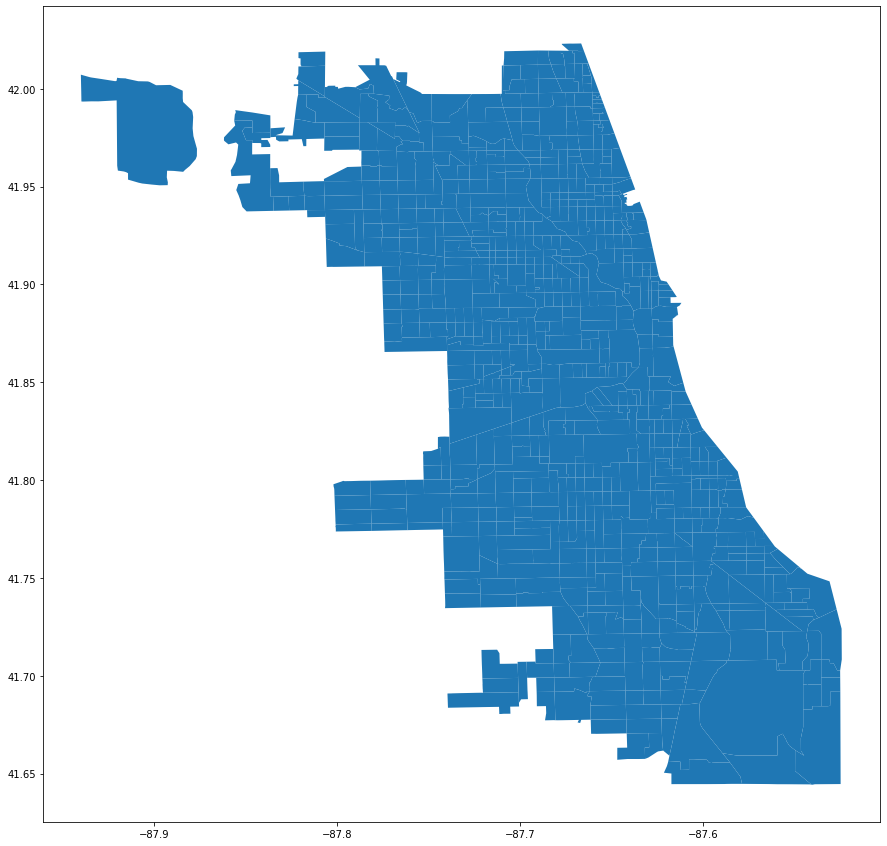

In [28]:
fig,ax = plt.subplots(figsize = (15,15))
chicago_tracts.plot(ax = ax)

#plot chicago tracts

In [29]:
crs = {'init': 'epsg:4326'}

#set projection

In [40]:
demosgeom = [Point(xy) for xy in zip(demosall["longitude"], demosall["latitude"])]
demosgeom[:3]


In [72]:
demos_geodf = gpd.GeoDataFrame(demosall,
                              crs = {'init': 'epsg:4326'},
                              geometry = demosgeom)

#create geodataframe from demos latlongs

In [73]:
schoolsgeom = [Point(xy) for xy in zip(schoolsall["longitude"], schoolsall["latitude"])]
schoolsgeom[:3]

In [74]:
schools_geodf = gpd.GeoDataFrame(schoolsall,
                              crs = {'init': 'epsg:4326'},
                              geometry = schoolsgeom)

#create geodataframe from schools latlongs

In [75]:
chartersgeom = [Point(xy) for xy in zip(chartersall["longitude"], chartersall["latitude"])]
chartersgeom[:3]

In [76]:
charters_geodf = gpd.GeoDataFrame(chartersall,
                              crs = {'init': 'epsg:4326'},
                              geometry = chartersgeom)

#create geodataframe from charters latlongs

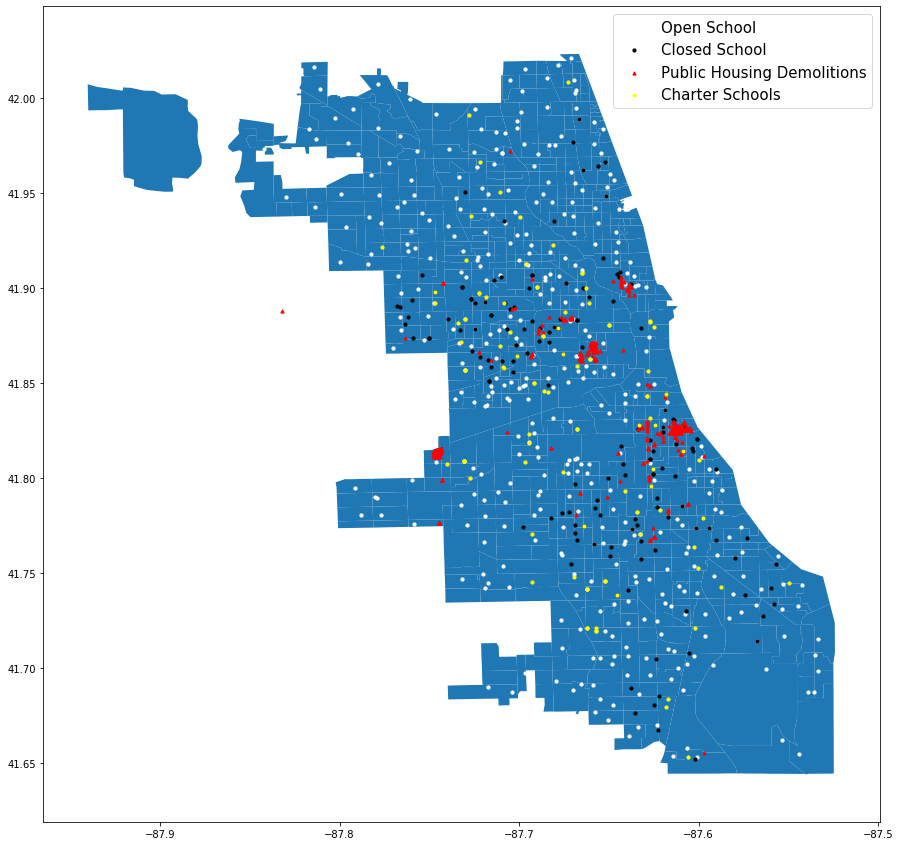

In [89]:
fig,ax = plt.subplots(figsize = (15,15))
chicago_tracts.plot(ax = ax)
schools_geodf[schools_geodf['C_T'] == 0].plot(ax = ax, markersize = 10, color = "white", marker = "o", label = "Open School")
schools_geodf[schools_geodf['C_T'] == 1].plot(ax = ax, markersize = 10, color = "black", marker = "o", label = "Closed School")
demos_geodf.plot(ax = ax, markersize = 10, color = "red", marker = "^", label = "Public Housing Demolitions")
charters_geodf.plot(ax = ax, markersize = 10, color = "yellow", marker = "o", label = "Charter Schools")
minx, miny, maxx, maxy = chicago_tracts.total_bounds
ax.set_xlim(minx - .025, maxx + .025)
ax.set_ylim(miny - .025, maxy + .025)
plt.legend(prop={'size':15})

# plot tracts, public non-charter schools (with different markers for open and closed schools), demolitions, and charters
# set chicago tracts shapefile as the total bounds of the plotted map, with a buffer around the edges 

TypeError: 'GeoDataFrame' object is not callable

NameError: name 'destination' is not defined